In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import json

########################SET folder to path of code directory in the project folder#####################
## SET PATH to code directory in the project folder
code_path = "C:\\Users\\evdoxiataka\\codes\\effi_user_study_1\\code\\"
import sys  
sys.path.insert(1, code_path)

########################SET folder to project directory path#####################
folder="C:\\Users\\evdoxiataka\\codes\\effi_user_study_1\\"

from utils.utils import *
from utils.visualization import *

import matplotlib
import matplotlib.pyplot as plt

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

sensitive_attrs = ["CODE_GENDER","NAME_FAMILY_STATUS","AGE"]
all_attributes = list(attributes_names_mapping.keys())
# all_attributes.remove("CODE_GENDER")
# all_attributes.remove("NAME_FAMILY_STATUS")
# all_attributes.remove("AGE")
# sensitive_attrs = sensitive_attrs+all_attributes
fs = 0.5

##
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']

##
group_fair = ['DemographicParityRatio',
              'ConditionalDemographicDisparity',
              'EqualOpportunityDifference',
              'AverageOddsDifference',
              'PredictiveParity']
group_fair_codes = ['DPR','CDD','EOD','AOD','PPD']
indiv_fair = ['consistency_10','theil_index']

# Global Model

## Labels ('fair'+'unfair')

In [7]:
df_group_global_ap1 = pd.read_csv(#folder+'data/results/global/Labels/group_fairness_global-Labels_withdupl.csv', 
                                  folder+'data/results/global/Labels/group_fairness_global-Labels.csv', 
                                  delimiter=',')
df_indiv_global_ap1 = pd.read_csv(#folder+'data/results/global/Labels/individual_fairness_global-Labels_withdupl.csv', 
                                  folder+'data/results/global/Labels/individual_fairness_global-Labels.csv', 
                                  delimiter=',')
df_acc_global_ap1 = pd.read_csv(
                                # folder+'data/results/global/Labels/accuracy_global-Labels_withdupl.csv', 
                                folder+'data/results/global/Labels/accuracy_global-Labels.csv', 
                                delimiter=',')

perc_change_df1 = get_percentage_change_oneoff(df_group_global_ap1, group_fair, 
                                            df_indiv_global_ap1, indiv_fair, 
                                             df_acc_global_ap1,
                                            all_attributes, fs)
##
perc_change_df1.to_csv(#folder+"data/results/global/Labels/perc_change_global-Labels_withdupl.csv", 
                       folder+"data/results/global/Labels/perc_change_global-Labels.csv", 
                       index=False)
# perc_change_df

## Labels ('unfair') 

In [8]:
df_group_global_ap2 = pd.read_csv(#folder+'data/results/global/Labels_Unfair/group_fairness_global-Labels_Unfair_withdupl.csv', 
                                  folder+'data/results/global/Labels_Unfair/group_fairness_global-Labels_Unfair.csv',
                                  delimiter=',')
df_indiv_global_ap2 = pd.read_csv(#folder+'data/results/global/Labels_Unfair/individual_fairness_global-Labels_Unfair_withdupl.csv',
                                  folder+'data/results/global/Labels_Unfair/individual_fairness_global-Labels_Unfair.csv', 
                                  delimiter=',')
df_acc_global_ap2 = pd.read_csv(#folder+'data/results/global/Labels_Unfair/accuracy_global-Labels_Unfair_withdupl.csv', 
                                folder+'data/results/global/Labels_Unfair/accuracy_global-Labels_Unfair.csv', 
                                delimiter=',')

perc_change_df2 = get_percentage_change_oneoff(df_group_global_ap2, group_fair, 
                                            df_indiv_global_ap2, indiv_fair, 
                                             df_acc_global_ap2,
                                            all_attributes, fs)
##
perc_change_df2.to_csv(#folder+"data/results/global/Labels_Unfair/perc_change_global-Labels_Unfair_withdupl.csv", 
                       folder+"data/results/global/Labels_Unfair/perc_change_global-Labels_Unfair.csv", 
                       index=False)
# perc_change_df2

## Labels+Weights ('fair'+'unfair')

In [10]:
df_group_global_ap3 = pd.read_csv(#folder+'data/results/global/Labels+Weights/group_fairness_global-Labels+Weights_withdupl.csv', 
                                  folder+'data/results/global/Labels+Weights/group_fairness_global-Labels+Weights.csv',
                                  delimiter=',')
df_indiv_global_ap3 = pd.read_csv(#folder+'data/results/global/Labels+Weights/individual_fairness_global-Labels+Weights_withdupl.csv', 
                                  folder+'data/results/global/Labels+Weights/individual_fairness_global-Labels+Weights.csv', 
                                  delimiter=',')
df_acc_global_ap3 = pd.read_csv(#folder+'data/results/global/Labels+Weights/accuracy_global-Labels+Weights_withdupl.csv', 
                                folder+'data/results/global/Labels+Weights/accuracy_global-Labels+Weights.csv',
                                delimiter=',')

perc_change_df3 = get_percentage_change_oneoff(df_group_global_ap3, group_fair, 
                                            df_indiv_global_ap3, indiv_fair, 
                                             df_acc_global_ap3,
                                            all_attributes, fs)
##
perc_change_df3.to_csv(#folder+"data/results/global/Labels+Weights/perc_change_global-Labels+Weights_withdupl.csv", 
                       folder+"data/results/global/Labels+Weights/perc_change_global-Labels+Weights.csv", 
                       index=False)
# perc_change_df

# Personalized Models

## Labels ('fair'+'unfair')

In [2]:
df_group = pd.read_csv(folder+'data/results/personalized/Labels/group_fairness_personalized-Labels_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data/results/personalized/Labels/individual_fairness_personalized-Labels_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data/results/personalized/Labels/accuracy_personalized-Labels_with_cma.csv', delimiter=',')

perc_change_df =  pd.read_csv(folder+"data/results/personalized/Labels/perc_change_personalized-Labels_raw.csv", delimiter=',')
cma_perc_change_df = pd.read_csv(folder+"data/results/personalized/Labels/perc_change_personalized-Labels_cma.csv", delimiter=',')

p_ids = perc_change_df['participant_id'].tolist()

### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
clustered_data = []
for i in cma_perc_change_df.index:
    clustered_data.append(cma_perc_change_df.loc[i].tolist()[:-3])
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
nc = 3
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df.copy(deep=True)
clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
for i,centroid in enumerate(cluster_centroids):
    centroid = centroid.tolist()
    centroid.append('centroid')
    centroid.append(i)
    clustered_data_df.loc[58+i] = centroid
clustered_data_df.to_csv(folder+"data/results/personalized/Labels/perc_change_personalized-Labels_clustering_cma.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels_Clustering_CMA_Group_{}'.format(cl)
    filename = 'lineGraphs_personalized-Labels_Clustering_CMA_Group_{}'.format(cl)
    image_type = '.jpeg'
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                folder+'data/results/personalized-Labels/figures/clustering/', filename, image_type, 
                                sensitive_attrs, 
                                group_fair, group_fair_codes, 
                                indiv_fair, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)], 
                                df_indiv.loc[df_indiv['participant_id'].isin(cl_participants)], 
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change bar graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels_ Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels_Clustering_CMA_Group_cl{}.pdf'
fPath = folder+'data/results/personalized-Labels/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio',
           'ConditionalDemographicDisparity',
           'EqualOpportunityDifference',
           'AverageOddsDifference',
           'PredictiveParity']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Perc. change bar graph of all participants

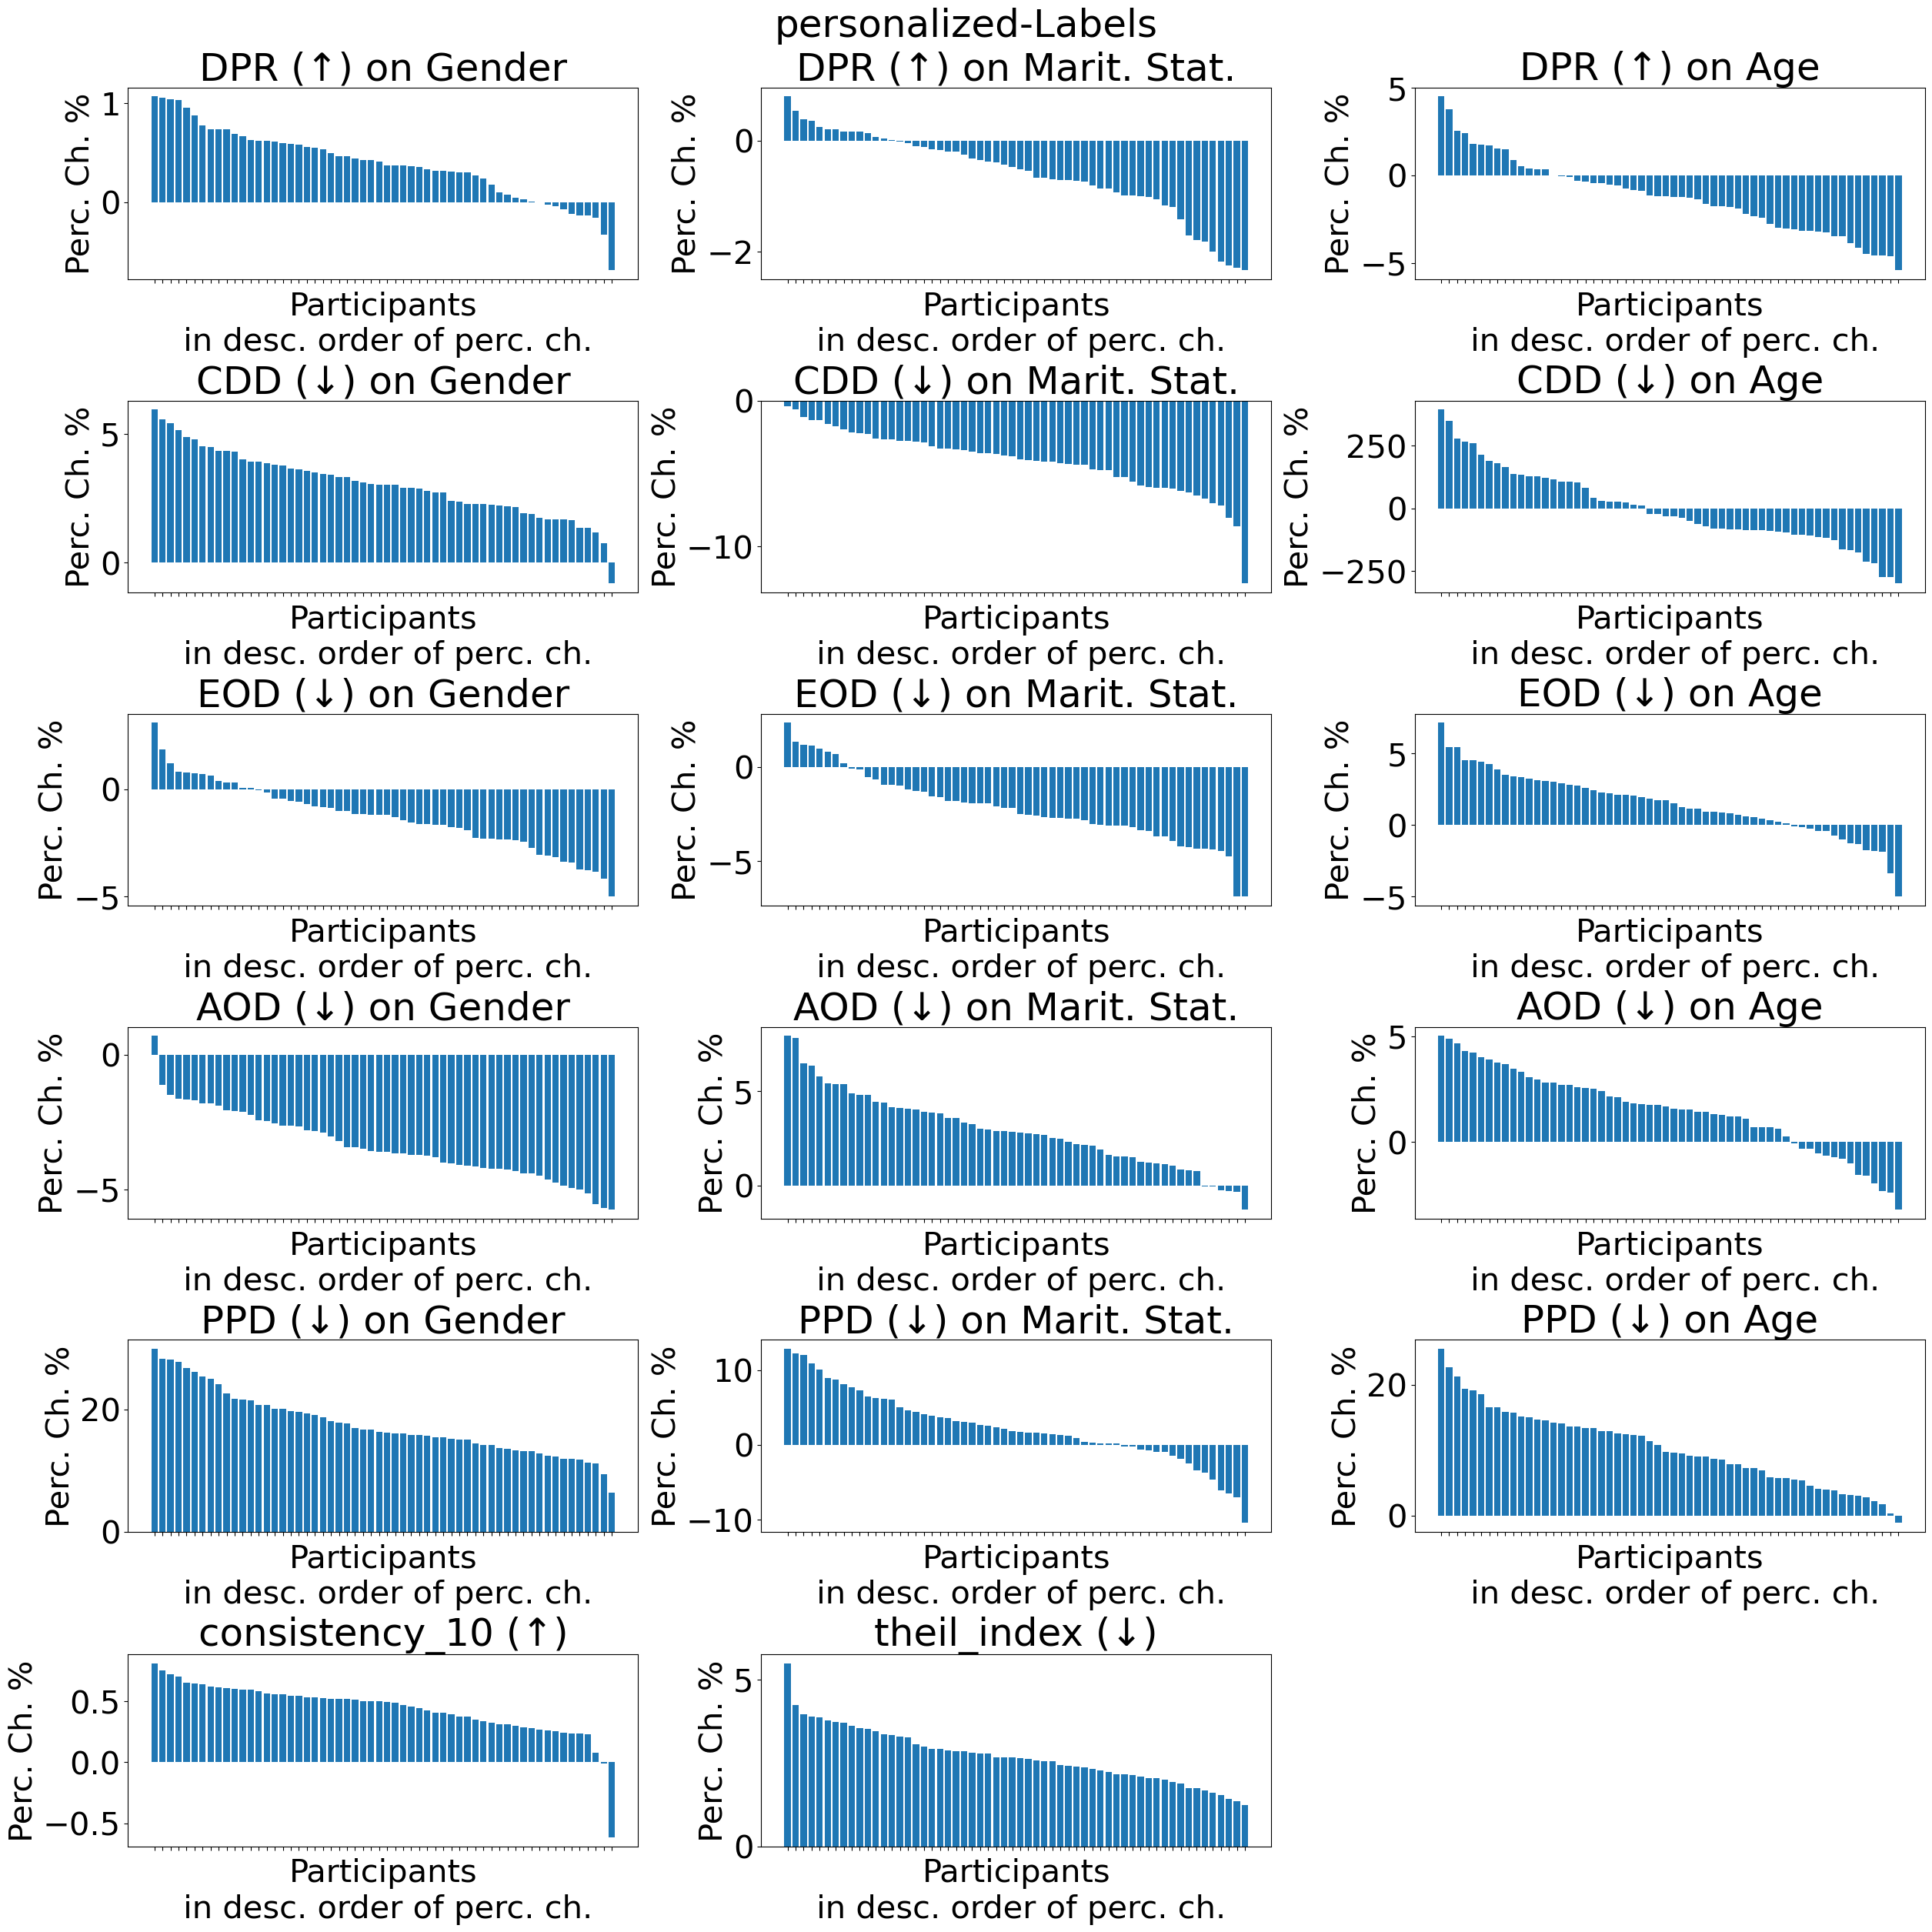

In [3]:
## plot perc. change plot for all fairness metrics
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels'
file_name = 'percChange_Graphs_personalized-Labels.pdf'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','ConditionalDemographicDisparity','EqualOpportunityDifference',
                    'AverageOddsDifference','PredictiveParity','indiv.']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots(perc_ch_df, title, file_name, 
                  folder+'data/results/personalized/Labels/figures/', 
                  attrs, attrs_codes, group_f, group_fair_cod)

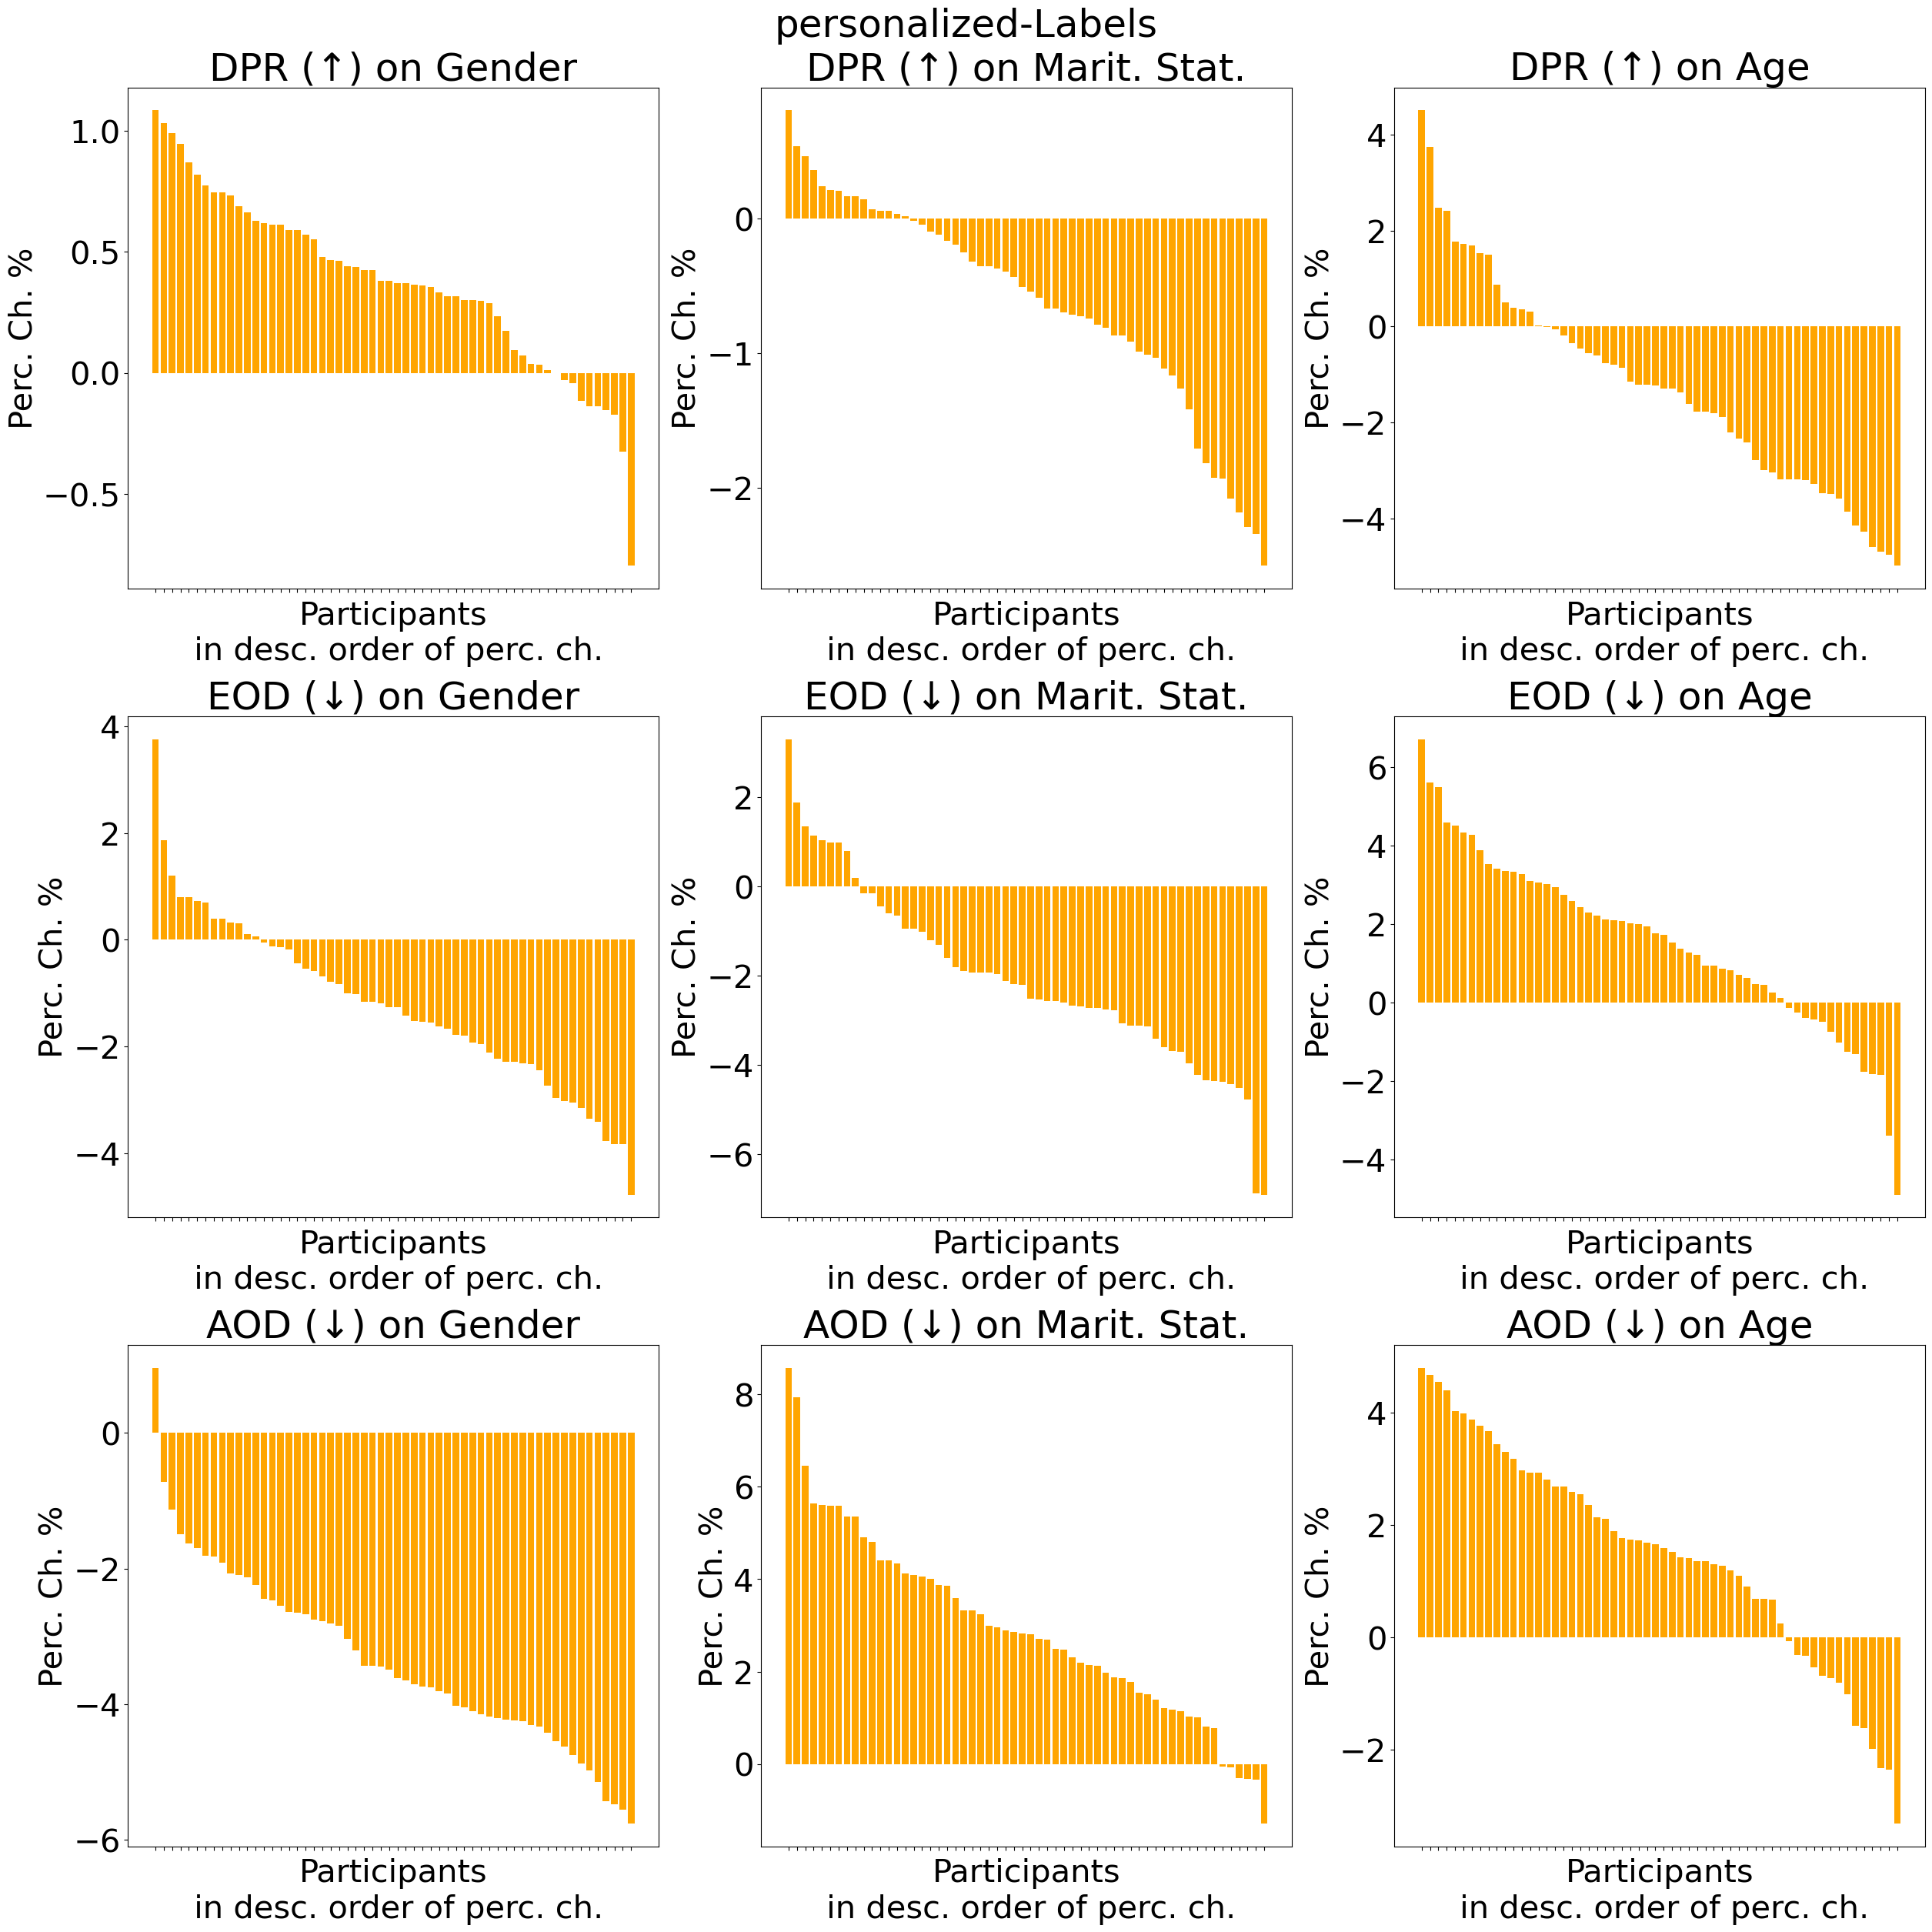

In [3]:
## plot perc. change plot for DPR and AOD
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels'
file_name = 'percChange_Graphs_personalized-Labels_short.pdf'
fPath = folder+'data/results/personalized/Labels/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','EqualOpportunityDifference','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','EOD (↓)','AOD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

In [6]:
perc_ch_df.columns

Index(['CODE_GENDER_DemographicParityRatio',
       'CODE_GENDER_ConditionalDemographicDisparity',
       'CODE_GENDER_EqualOpportunityDifference',
       'CODE_GENDER_AverageOddsDifference', 'CODE_GENDER_PredictiveParity',
       'NAME_FAMILY_STATUS_DemographicParityRatio',
       'NAME_FAMILY_STATUS_ConditionalDemographicDisparity',
       'NAME_FAMILY_STATUS_EqualOpportunityDifference',
       'NAME_FAMILY_STATUS_AverageOddsDifference',
       'NAME_FAMILY_STATUS_PredictiveParity', 'AGE_DemographicParityRatio',
       'AGE_ConditionalDemographicDisparity', 'AGE_EqualOpportunityDifference',
       'AGE_AverageOddsDifference', 'AGE_PredictiveParity', 'consistency_10',
       'theil_index', 'participant_id', 'color'],
      dtype='object')

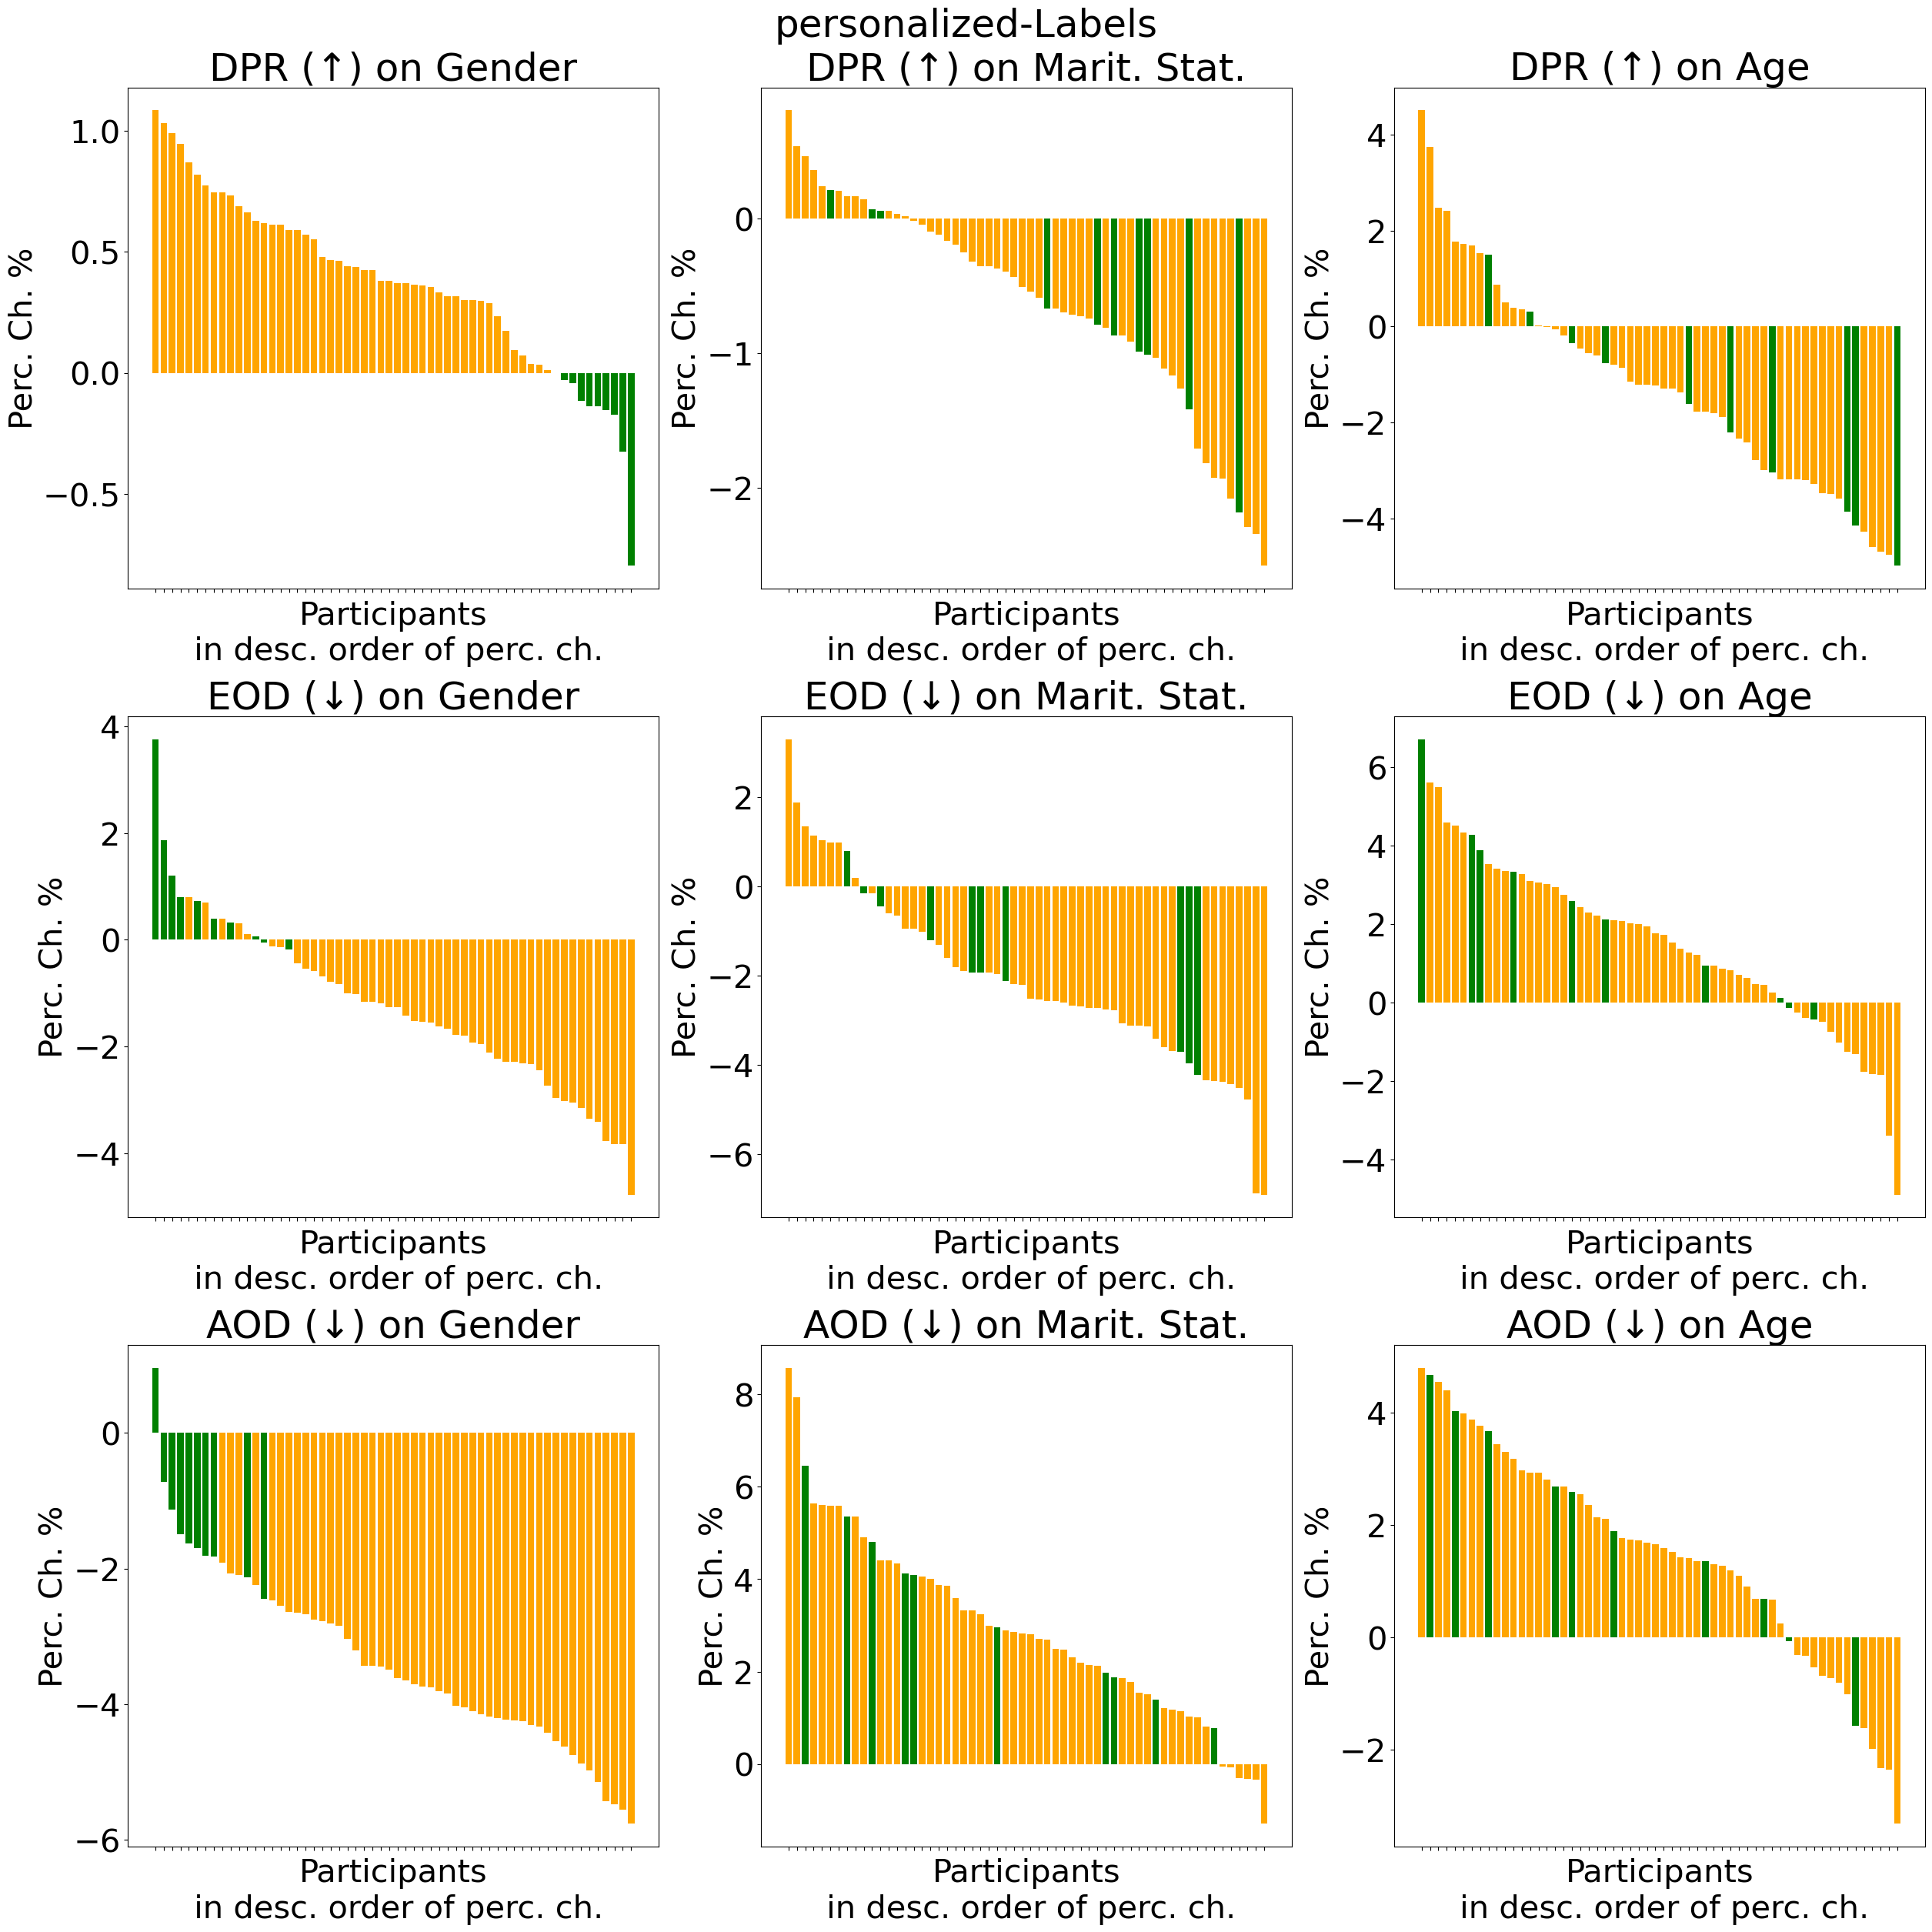

In [4]:
## plot perc. change plot for DPR and AOD
parts = cma_perc_change_df[cma_perc_change_df['CODE_GENDER_DemographicParityRatio']>0]['participant_id'].tolist()
colors = ['orange' if cma_perc_change_df.loc[idx]['participant_id'] in parts else 'green' for idx in cma_perc_change_df.index]
perc_ch_df = cma_perc_change_df.copy()
perc_ch_df['color'] = colors
title = 'personalized-Labels'
file_name = 'percChange_Graphs_personalized-Labels_short_DPRGENDERGReater0.pdf'
fPath = folder+'data/results/personalized/Labels/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','EqualOpportunityDifference','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','EOD (↓)','AOD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Parallel Coordinate Plot

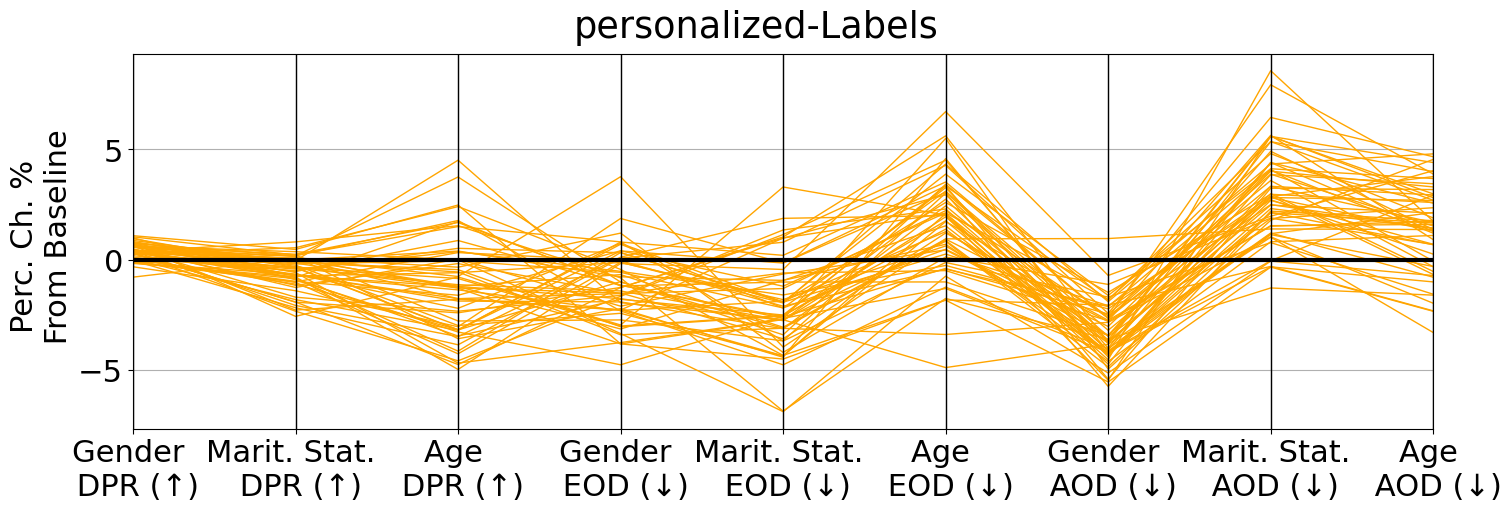

In [29]:
cma_subset = cma_perc_change_df[['CODE_GENDER_DemographicParityRatio','NAME_FAMILY_STATUS_DemographicParityRatio','AGE_DemographicParityRatio',
                                 'CODE_GENDER_EqualOpportunityDifference','NAME_FAMILY_STATUS_EqualOpportunityDifference','AGE_EqualOpportunityDifference',
                                 'CODE_GENDER_AverageOddsDifference','NAME_FAMILY_STATUS_AverageOddsDifference','AGE_AverageOddsDifference']]
cma_subset['class'] = [0]*len(cma_perc_change_df)

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(15, 5), layout="constrained")
fig.suptitle('personalized-Labels')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5,6,7,8],[0,0,0,0,0,0,0,0,0], color='black',lw=3)
# axes.set_ylim(-61,20)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 'Marit. Stat. \n DPR (↑)','Age \n DPR (↑)',
                           'Gender \n EOD (↓)', 'Marit. Stat. \n EOD (↓)','Age \n EOD (↓)',
                           'Gender \n AOD (↓)', 'Marit. Stat. \n AOD (↓)','Age \n AOD (↓)'])
axes.get_legend().remove()
##
fPath = folder+'data/results/personalized/Labels/figures/'
file_name = 'parallelCoordGraph_personalized-Labels_CMA.jpg'
fig.savefig(fPath+file_name, dpi=300)
plt.show()

### Line (Raw and CMA) plots

#### Joint plot for all participants

In [ ]:
title = 'personalized-Labels_all'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, 
                            folder+'data/results/personalized/Labels/figures/', filename, image_type, 
                            sensitive_attrs, 
                            group_fair, group_fair_codes, 
                            indiv_fair, 
                            fs, 
                            df_group, df_indiv, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'personalized-Labels_{}'
image_type = '.jpeg'
plots_per_participant(title, 
                      folder+'data/results/personalized/Labels/figures/', 
                      image_type, 
                      sensitive_attrs, 
                      group_fair, group_fair_codes, 
                      indiv_fair, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True)

## Labels ('unfair' only)

In [2]:
df_group = pd.read_csv(folder+'data/results/personalized/Labels_Unfair/group_fairness_personalized-Labels_Unfair_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data/results/personalized/Labels_Unfair/individual_fairness_personalized-Labels_Unfair_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data/results/personalized/Labels_Unfair/accuracy_personalized-Labels_Unfair_with_cma.csv', delimiter=',')

perc_change_df =  pd.read_csv(folder+"data/results/personalized/Labels_Unfair/perc_change_personalized-Labels_Unfair_raw.csv", delimiter=',')
cma_perc_change_df =  pd.read_csv(folder+"data/results/personalized/Labels_Unfair/perc_change_personalized-Labels_Unfair_cma.csv", delimiter=',')

p_ids = perc_change_df['participant_id'].tolist()

### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
perc_change_array = []
for i in perc_change_df.index:
    perc_change_array.append(perc_change_df.loc[i].tolist()[:-3])
cma_perc_change_array = []
for i in cma_perc_change_df.index:
    cma_perc_change_array.append(cma_perc_change_df.loc[i].tolist()[:-3])

##
clustered_data = cma_perc_change_array
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
nc = 3
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df.copy(deep=True)
clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
for i,centroid in enumerate(cluster_centroids):
    centroid = centroid.tolist()
    centroid.append('centroid')
    centroid.append(i)
    clustered_data_df.loc[58+i] = centroid
clustered_data_df.to_csv(folder+"data/results/personalized/Labels_Unfair/perc_change_personalized-Labels_Unfair_clustering_cma_group.csv", index=False)
# clustered_data_df.to_csv("perc_change_IML-Labels_Unfair_clustering_cma_group+indiv.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels_Unfair_Clustering_CMA_Group_{}'.format(cl)
    filename = 'lineGraphs_personalized-Labels_Unfair_Clustering_CMA_Group_{}'.format(cl)
    image_type = '.jpeg'
    colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                folder+'data/results/personalized/Labels_Unfair/figures/clustering/', filename, image_type, 
                                sensitive_attrs, 
                                group_fair, group_fair_codes, 
                                indiv_fair, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)], 
                                df_indiv.loc[df_indiv['participant_id'].isin(cl_participants)], 
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels_Unfair Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels_Unfair_Clustering_CMA_Group_cl{}.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio',
           'ConditionalDemographicDisparity',
           'EqualOpportunityDifference',                    
           'AverageOddsDifference',
           'PredictiveParity']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

In [ ]:
## plot only DPR and AOD
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels_Unfair Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels_Unfair_Clustering_CMA_Group_cl{}_short.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','AOD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Perc. change plot of all participants

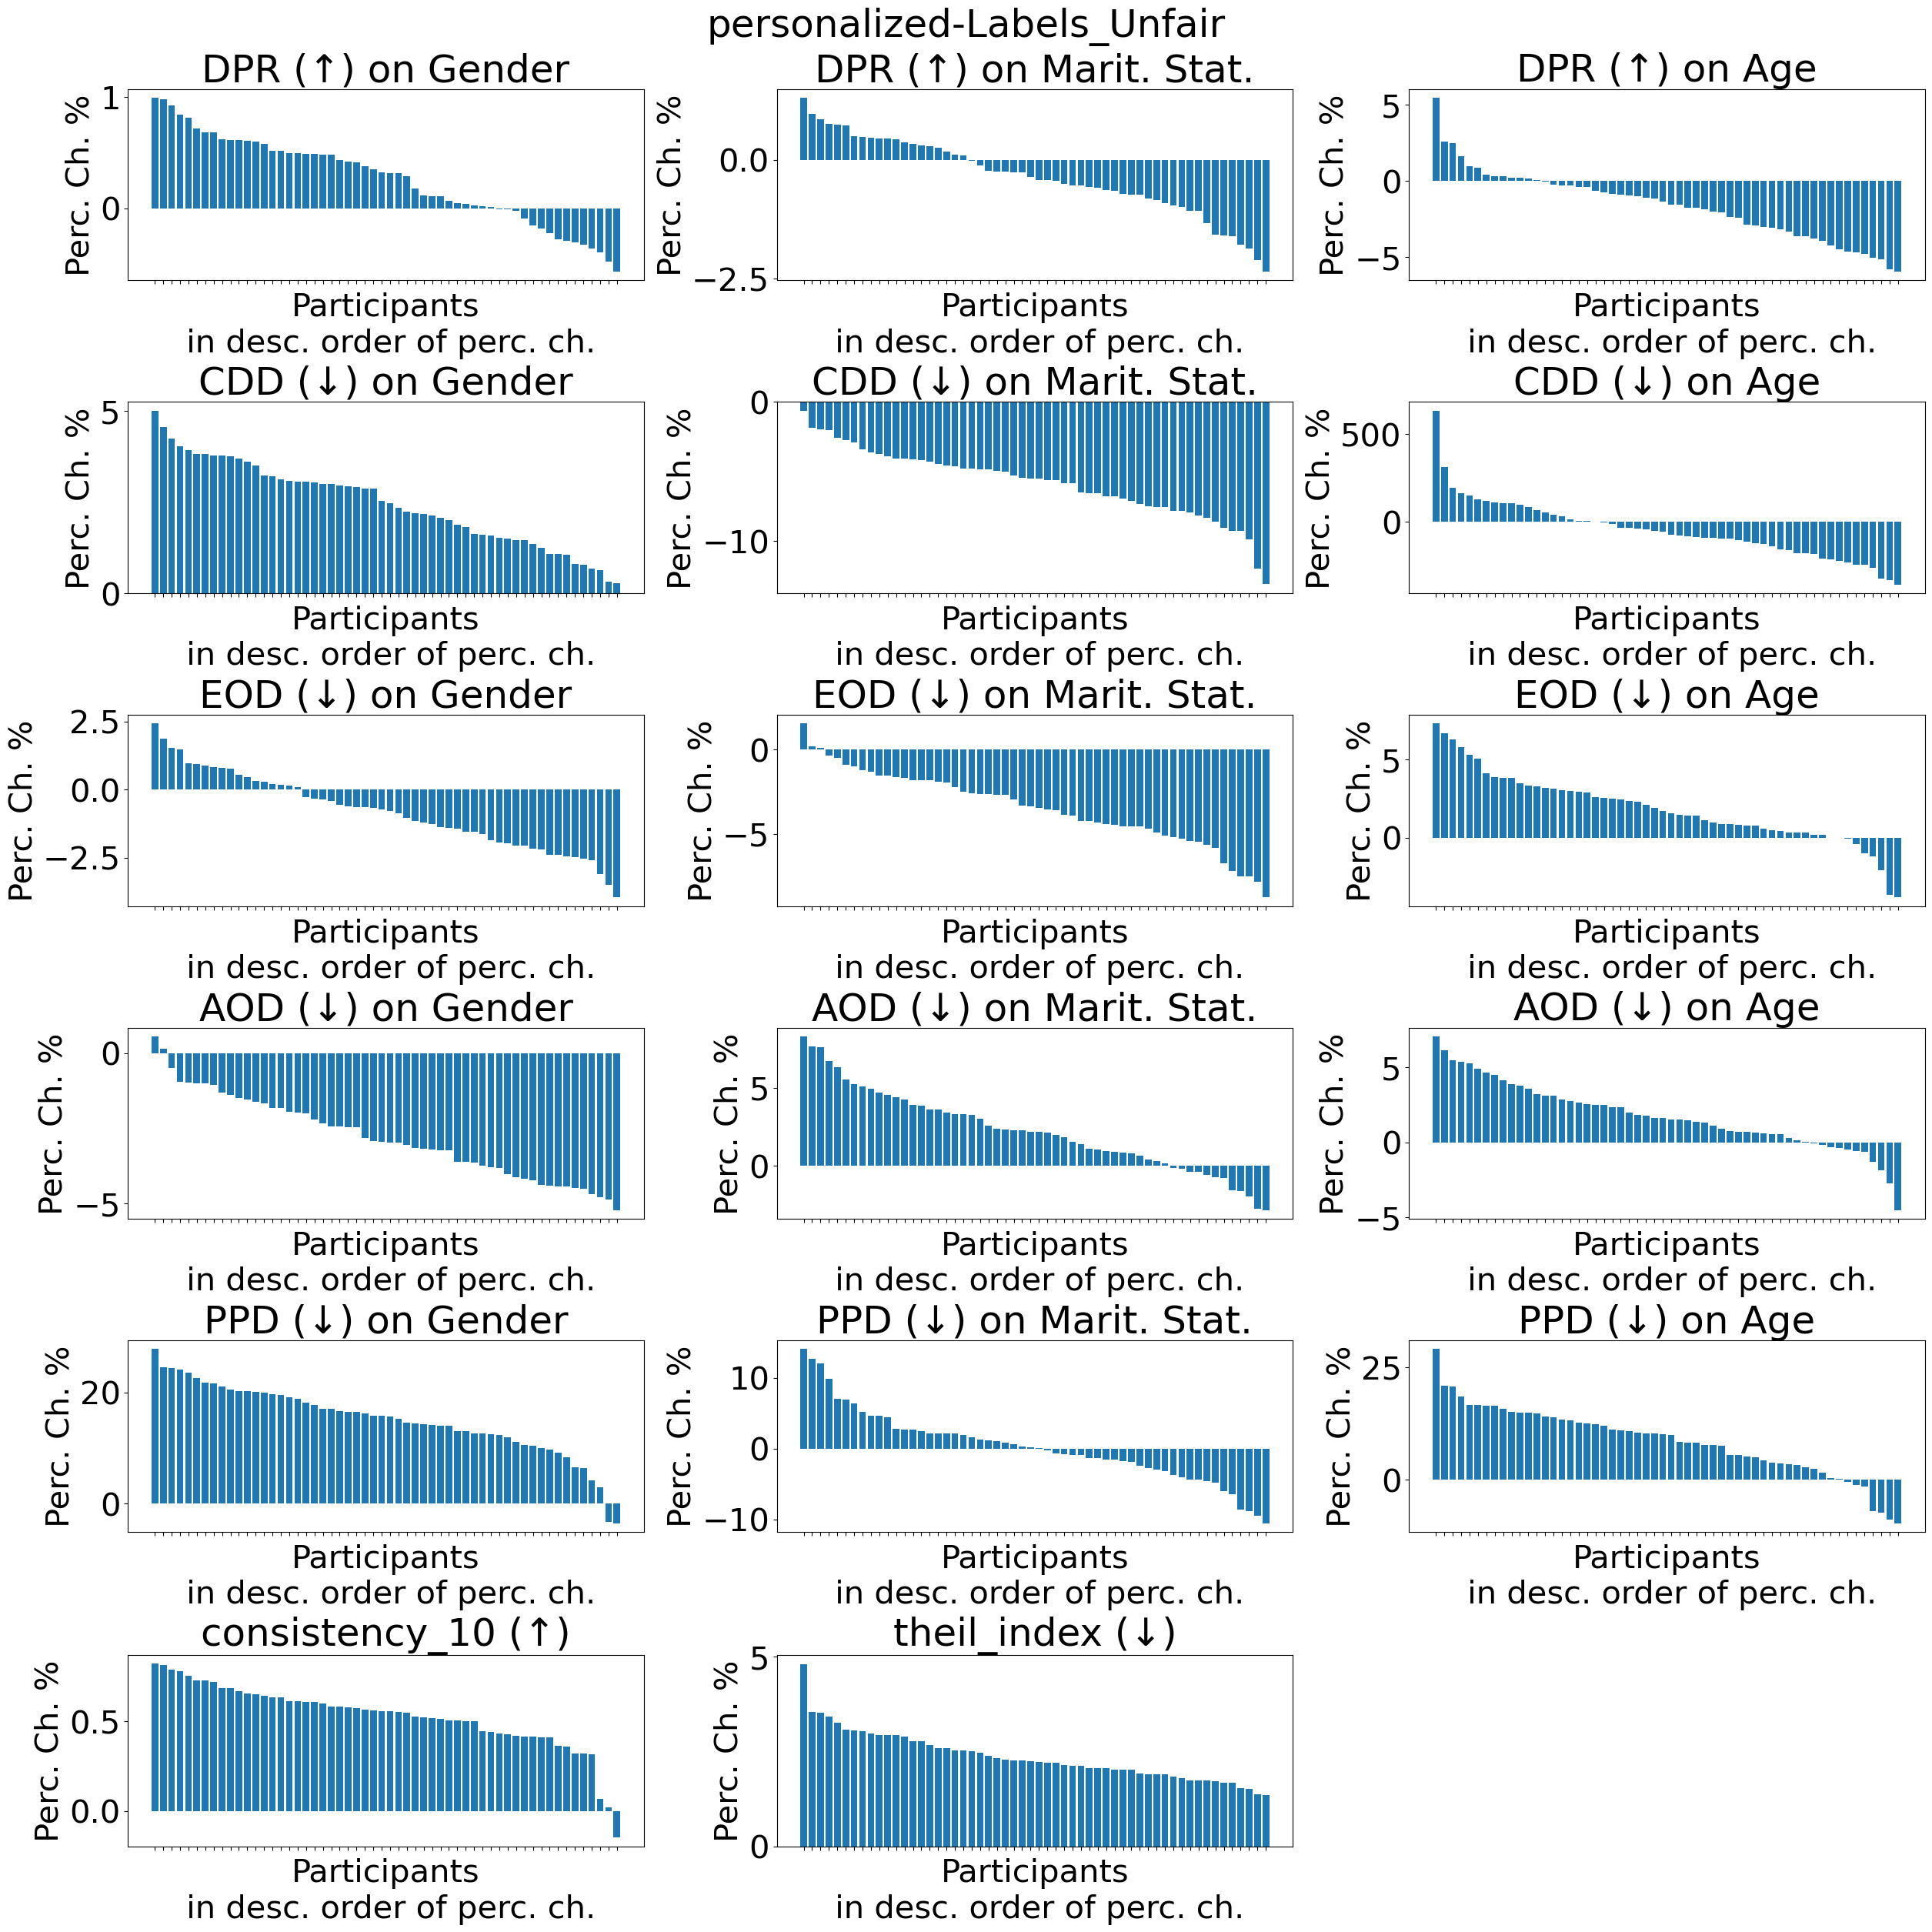

In [5]:
## plot perc. change plot for all fairness metrics
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels_Unfair'
file_name = 'percChange_Graphs_personalized-Labels_Unfair.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio',
           'ConditionalDemographicDisparity',
           'EqualOpportunityDifference',
            'AverageOddsDifference',
           'PredictiveParity','indiv.']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

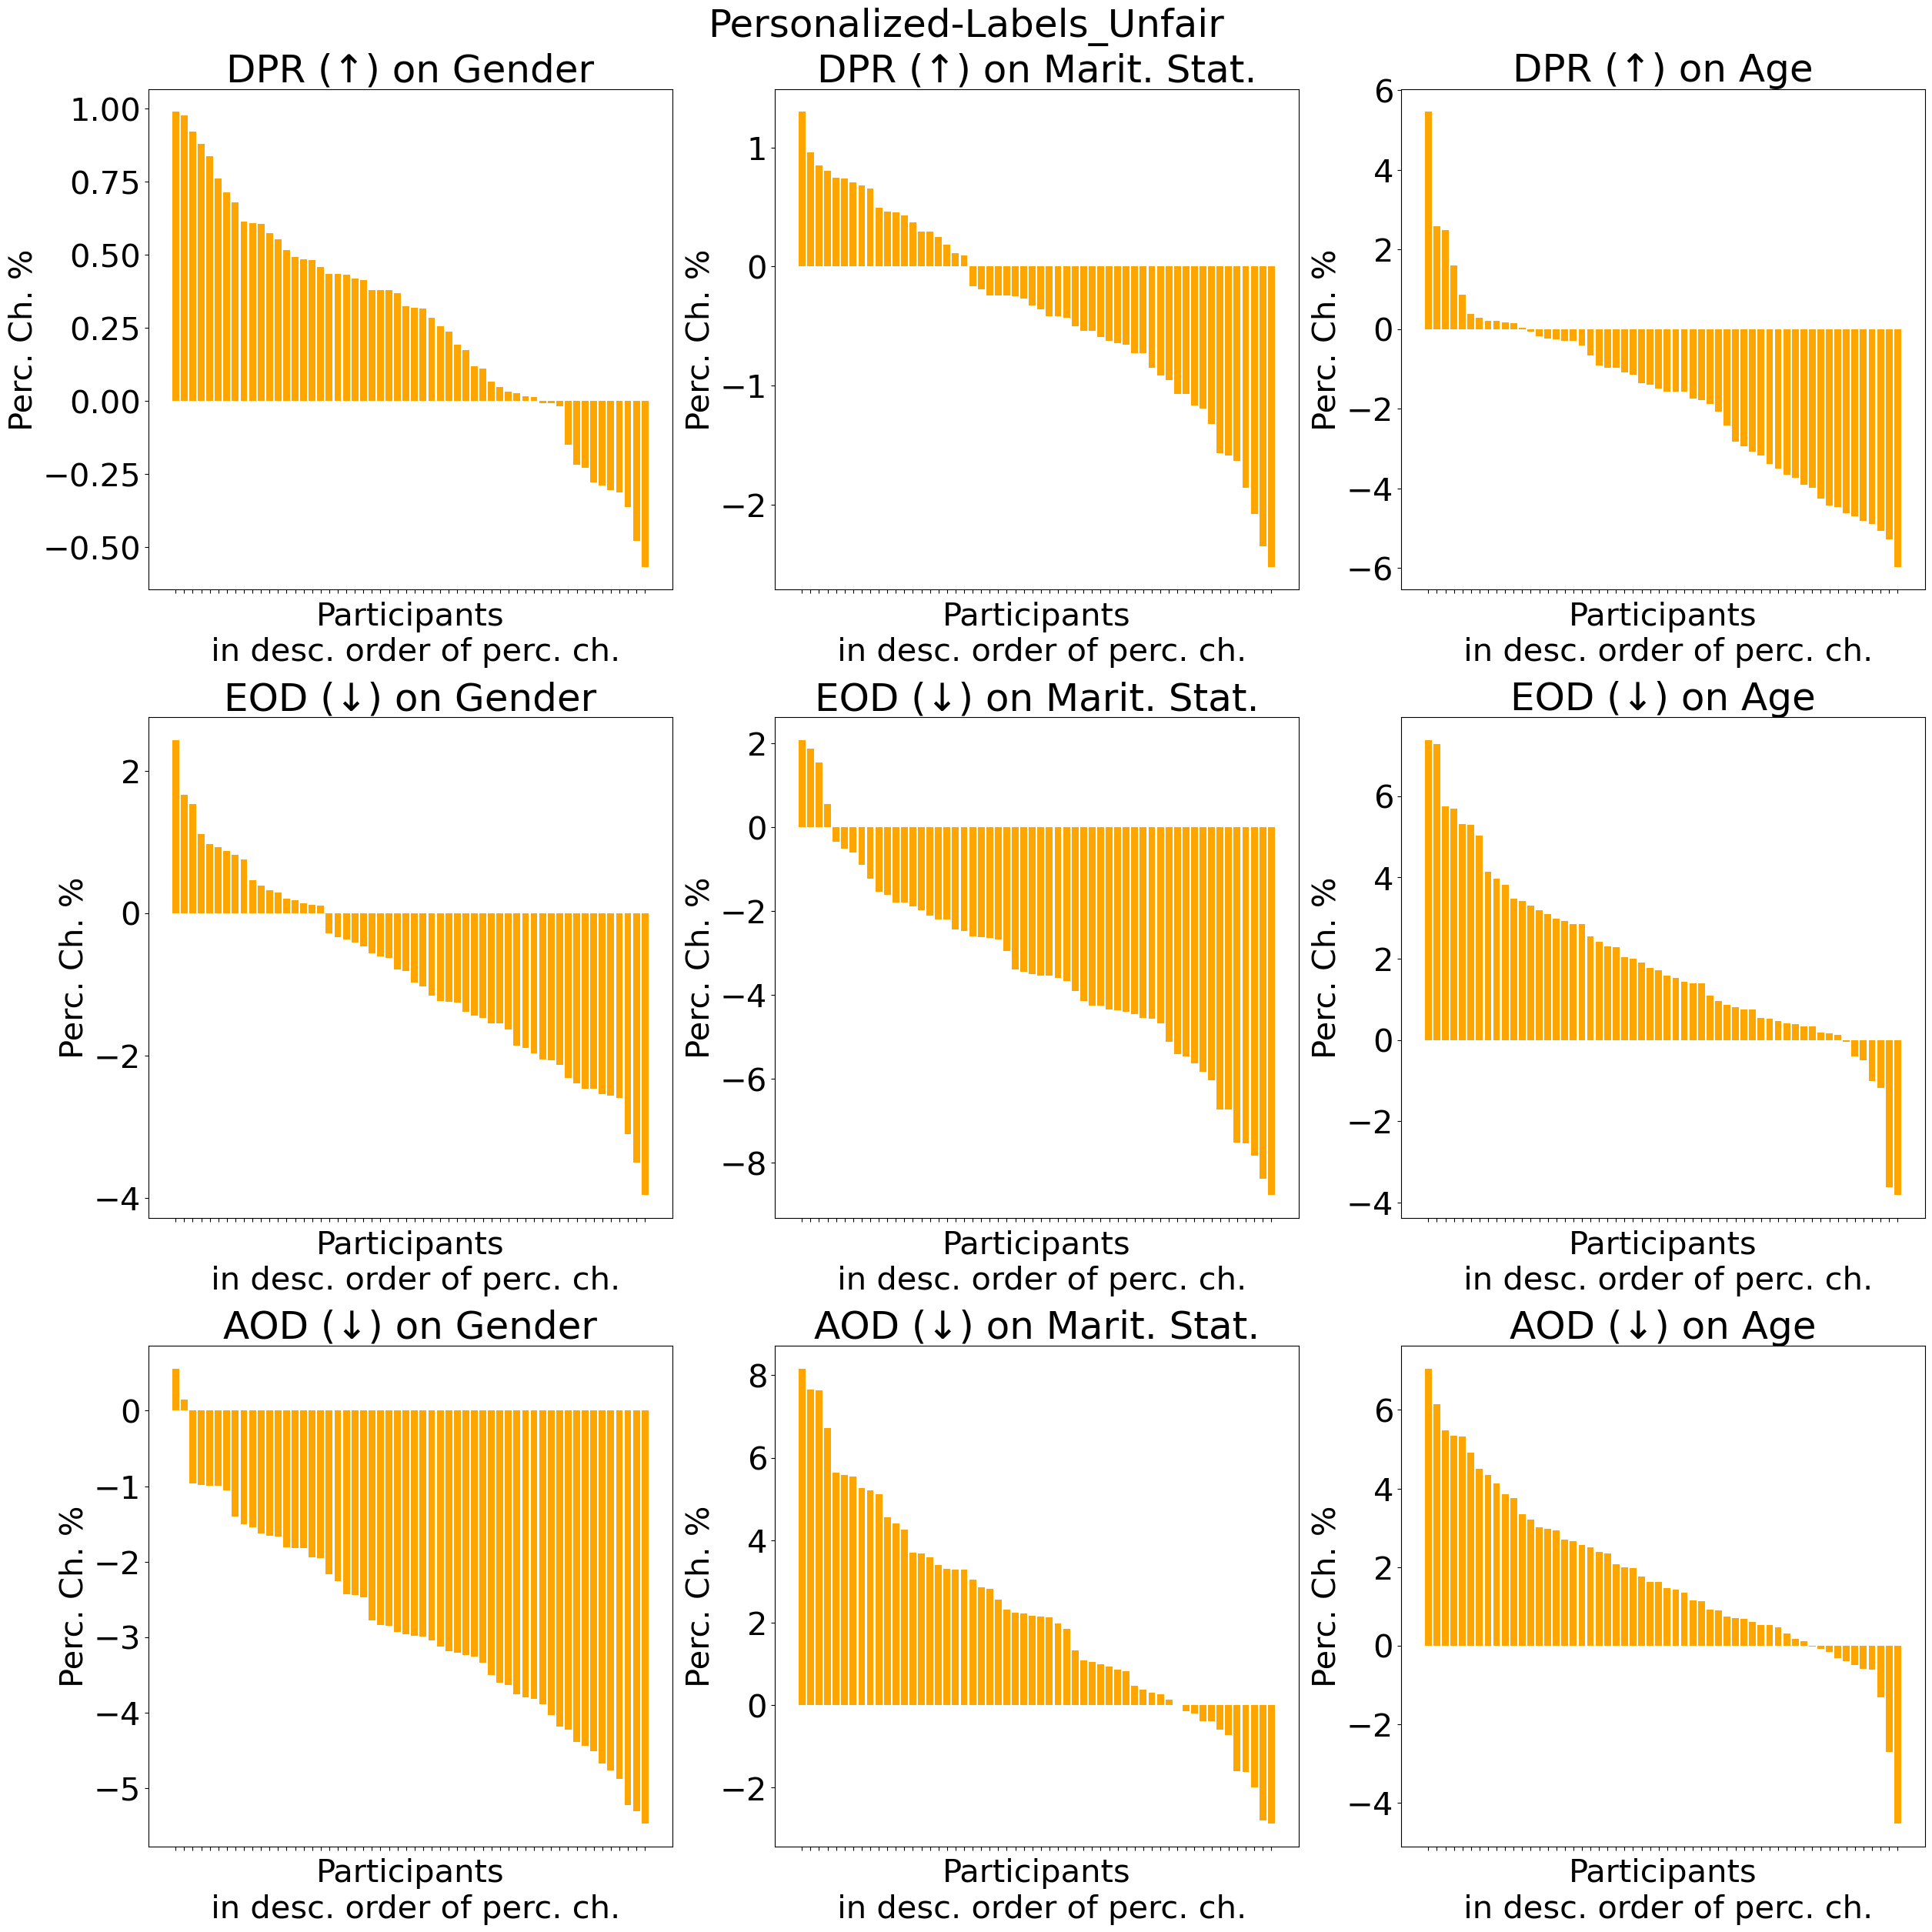

In [3]:
## plot perc. change plot for DPR and AOD
perc_ch_df = cma_perc_change_df
title = 'Personalized-Labels_Unfair'
file_name = 'percChange_Graphs_personalized-Labels_Unfair_short.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','EqualOpportunityDifference','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','EOD (↓)','AOD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

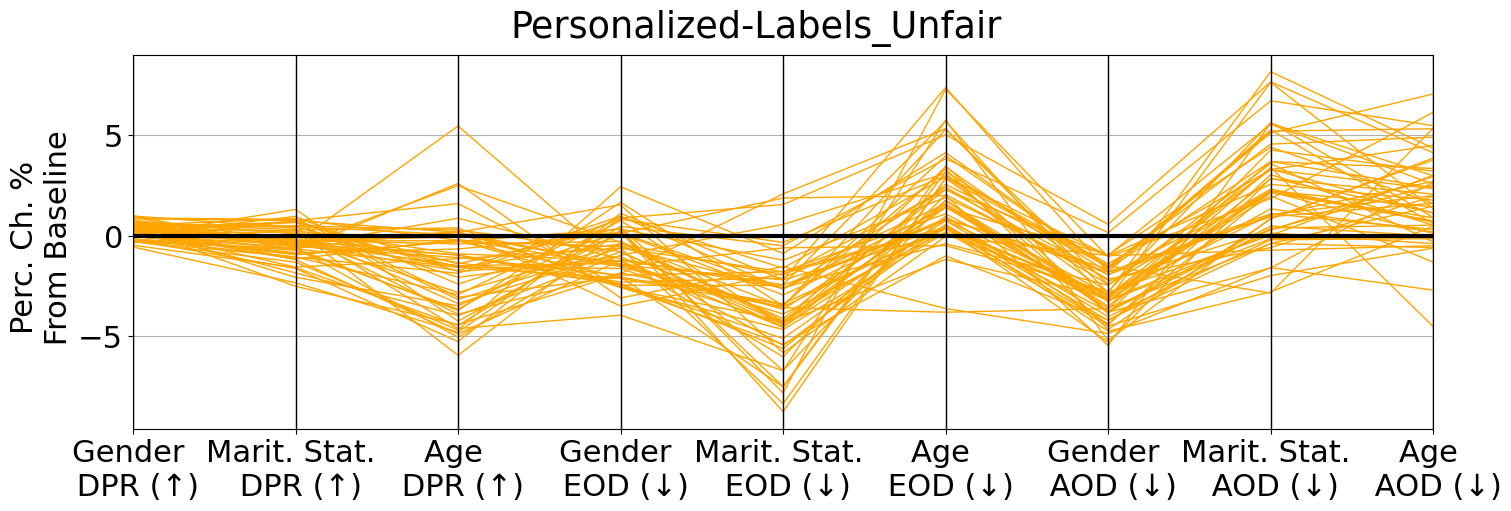

In [6]:
cma_subset = cma_perc_change_df[['CODE_GENDER_DemographicParityRatio','NAME_FAMILY_STATUS_DemographicParityRatio','AGE_DemographicParityRatio',
                                 'CODE_GENDER_EqualOpportunityDifference','NAME_FAMILY_STATUS_EqualOpportunityDifference','AGE_EqualOpportunityDifference',
                                 'CODE_GENDER_AverageOddsDifference','NAME_FAMILY_STATUS_AverageOddsDifference','AGE_AverageOddsDifference']]
cma_subset['class'] = [0]*len(cma_perc_change_df)

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(15, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5,6,7,8],[0,0,0,0,0,0,0,0,0], color='black',lw=3)
# axes.set_ylim(-61,20)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 'Marit. Stat. \n DPR (↑)','Age \n DPR (↑)',
                           'Gender \n EOD (↓)', 'Marit. Stat. \n EOD (↓)','Age \n EOD (↓)',
                           'Gender \n AOD (↓)', 'Marit. Stat. \n AOD (↓)','Age \n AOD (↓)'])
axes.get_legend().remove()
##
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
file_name = 'parallelCoordGraph_personalized-Labels_Unfair_CMA.jpg'
fig.savefig(fPath+file_name, dpi=300)
plt.show()

In [15]:
cma_subset = cma_subset = cma_perc_change_df[['participant_id','CODE_GENDER_DemographicParityRatio','NAME_FAMILY_STATUS_DemographicParityRatio','AGE_DemographicParityRatio','CODE_GENDER_AverageOddsDifference','NAME_FAMILY_STATUS_AverageOddsDifference','AGE_AverageOddsDifference']]
cma_subset

participant_id  CODE_GENDER_DemographicParityRatio  \
0   5e909231933994023e8b3c4d                           -0.277746   
1   5fe100d9ece28c2fa6e9a5a1                            0.285917   
2   60f5bcf96cd0848f008e3902                            0.017324   
3   6120211d8e1eab16fcb7ad69                            0.318030   
4   60e0e480c45d13e3fc1aae6b                            0.111430   
5   6151f4af8af3c53428216391                           -0.327280   
6   6101c49c2727ad36a6c593af                            0.379478   
7   60dc5726c777d9a0e550d1ca                            0.493176   
8   60e46e73e4c4216e7dcbe325                            0.575120   
9   5f256074297aac1d8ef7382d                           -0.180464   
10  60f724fd8ec131e82a00b129                            0.027625   
11  5d66a40c141c9800016a08a2                            0.434193   
12  5952a5175071bb0001ce96c7                            0.065611   
13  60c63a0fb09fbf271e554c36                           -0.008066   
14  608252263bd38a91cf28c121                            0.111732   
15  5c83f171fff8430001e997b4                            0.049111   
16  60e3303c9f5ea2fc726d58d8                            0.180449   
17  5c69824b98f65b0001353794                            0.606577   
18  6053c980f7612d61ed799ce9                           -0.018628   
19  6131460946d0022f68082db6                            0.482900   
20  611e7d1295185bf6f56fd951                            0.413950   
21  6103ec2bf88328284fd894bc                            0.976481   
22  5d1f440b3aac9200019067f1                           -0.289509   
23  5ea96851a879f0059741c4cb                           -0.566807   
24  5e8a39059d97d006d0bd8439                           -0.007368   
25  61090b7186e1761f97308af9                           -0.149847   
26  61065060bc55a8b70bc64d05                            0.807895   
27  5e465ab4c07877130185c306                            0.614690   
28  61138add299713969a18677d                            0.517145   
29  608aa72c95a49d6f70deb05e                            0.679440   
30  608aa18a3c2dfd212a1a77a9                            0.114325   
31  5f02fbee212873485f6ce5b8                            0.617557   
32  5eee30178ad8d20a8354fbac                           -0.218400   
33  61528e4039817788730f3263                           -0.362023   
34  60fbdc84b5cf124b05ece11b                            0.038187   
35  5ebed23204aa470f9e1299bb                            0.346389   
36  613a98d6fcbac0ce210ec3e6                            0.608073   
37  61320a26c3013321c8d54600                            0.922069   
38  6033acf84fec17043ffef374                            0.478569   
39  608ac15b0fd53965a32e5384                           -0.304330   
40  616db113a87ceedca7fbf94a                            0.484350   
41  6150ca3f37e1fe330f70311d                            0.678674   
42  616093ab4117242c856402c6                           -0.391213   
43  59cbe23a916c4d0001094710                            0.325195   
44  612288702a5316519e4e9602                            0.015156   
45  6124d49e3031bec395675af2                            0.486462   
46  61516f157092b66018472a2f                           -0.088404   
47  5f315855cb8aea6276244c19                           -0.477969   
48  5f28221bb87bb70bb9731f2c                            0.989994   
49  61687ebcd2a35ffb762d1928                            0.596221   
50  6088a7e22d5b98ef3f813a22                            0.511819   
51  6047ff03cb24e712c17514b7                            0.419290   
52  6229dc51dff340226697778e                            0.493499   
53  614b55e22ff3944a165736bb                            0.838976   
54  606c6e9f7e86c0264ab3d7d8                            0.316005   
55  5d66f23706e589000157e7ec                            0.713598   

    NAME_FAMILY_STATUS_DemographicParityRatio  AGE_DemographicParityRatio  \
0                                    0.746359               

In [6]:
import plotly.express as px
import pandas as pd
df1 = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
df2 = pd.DataFrame(dict(
    r=[1, 10, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
df1['Model'] = 'Model_A'
df2['Model'] = 'Model_B'
df = pd.concat([df1,df2], axis=0)
# fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig = px.line_polar(df, r='r', color='Model', theta='theta', line_close=True)
fig.show(renderer='iframe')
# plotly.offline.iplot(fig, filename='test')

In [5]:
df1 = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
df1['Model'] = 'Model_A'
df1

r                  theta    Model
0  1        processing cost  Model_A
1  5  mechanical properties  Model_A
2  2     chemical stability  Model_A
3  2      thermal stability  Model_A
4  3     device integration  Model_A

### Line (Raw and CMA) plots

#### Joint plots for all participants

In [ ]:
title = 'personalized-Labels_Unfair_all'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, fPath, filename, image_type, 
                            sensitive_attrs, 
                            group_fair, group_fair_codes, 
                            indiv_fair, 
                            fs, 
                            df_group, df_indiv, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'personalized-Labels_Unfair_{}'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
image_type = '.jpeg'
plots_per_participant(title, fPath, image_type, 
                      sensitive_attrs, 
                      group_fair, group_fair_codes, 
                      indiv_fair, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True)

#### Line graphs for DPR and AOD and 3 protected attributes for participant 608aa18a3c2dfd212a1a77a9 (personalized-Labels_Unfair)

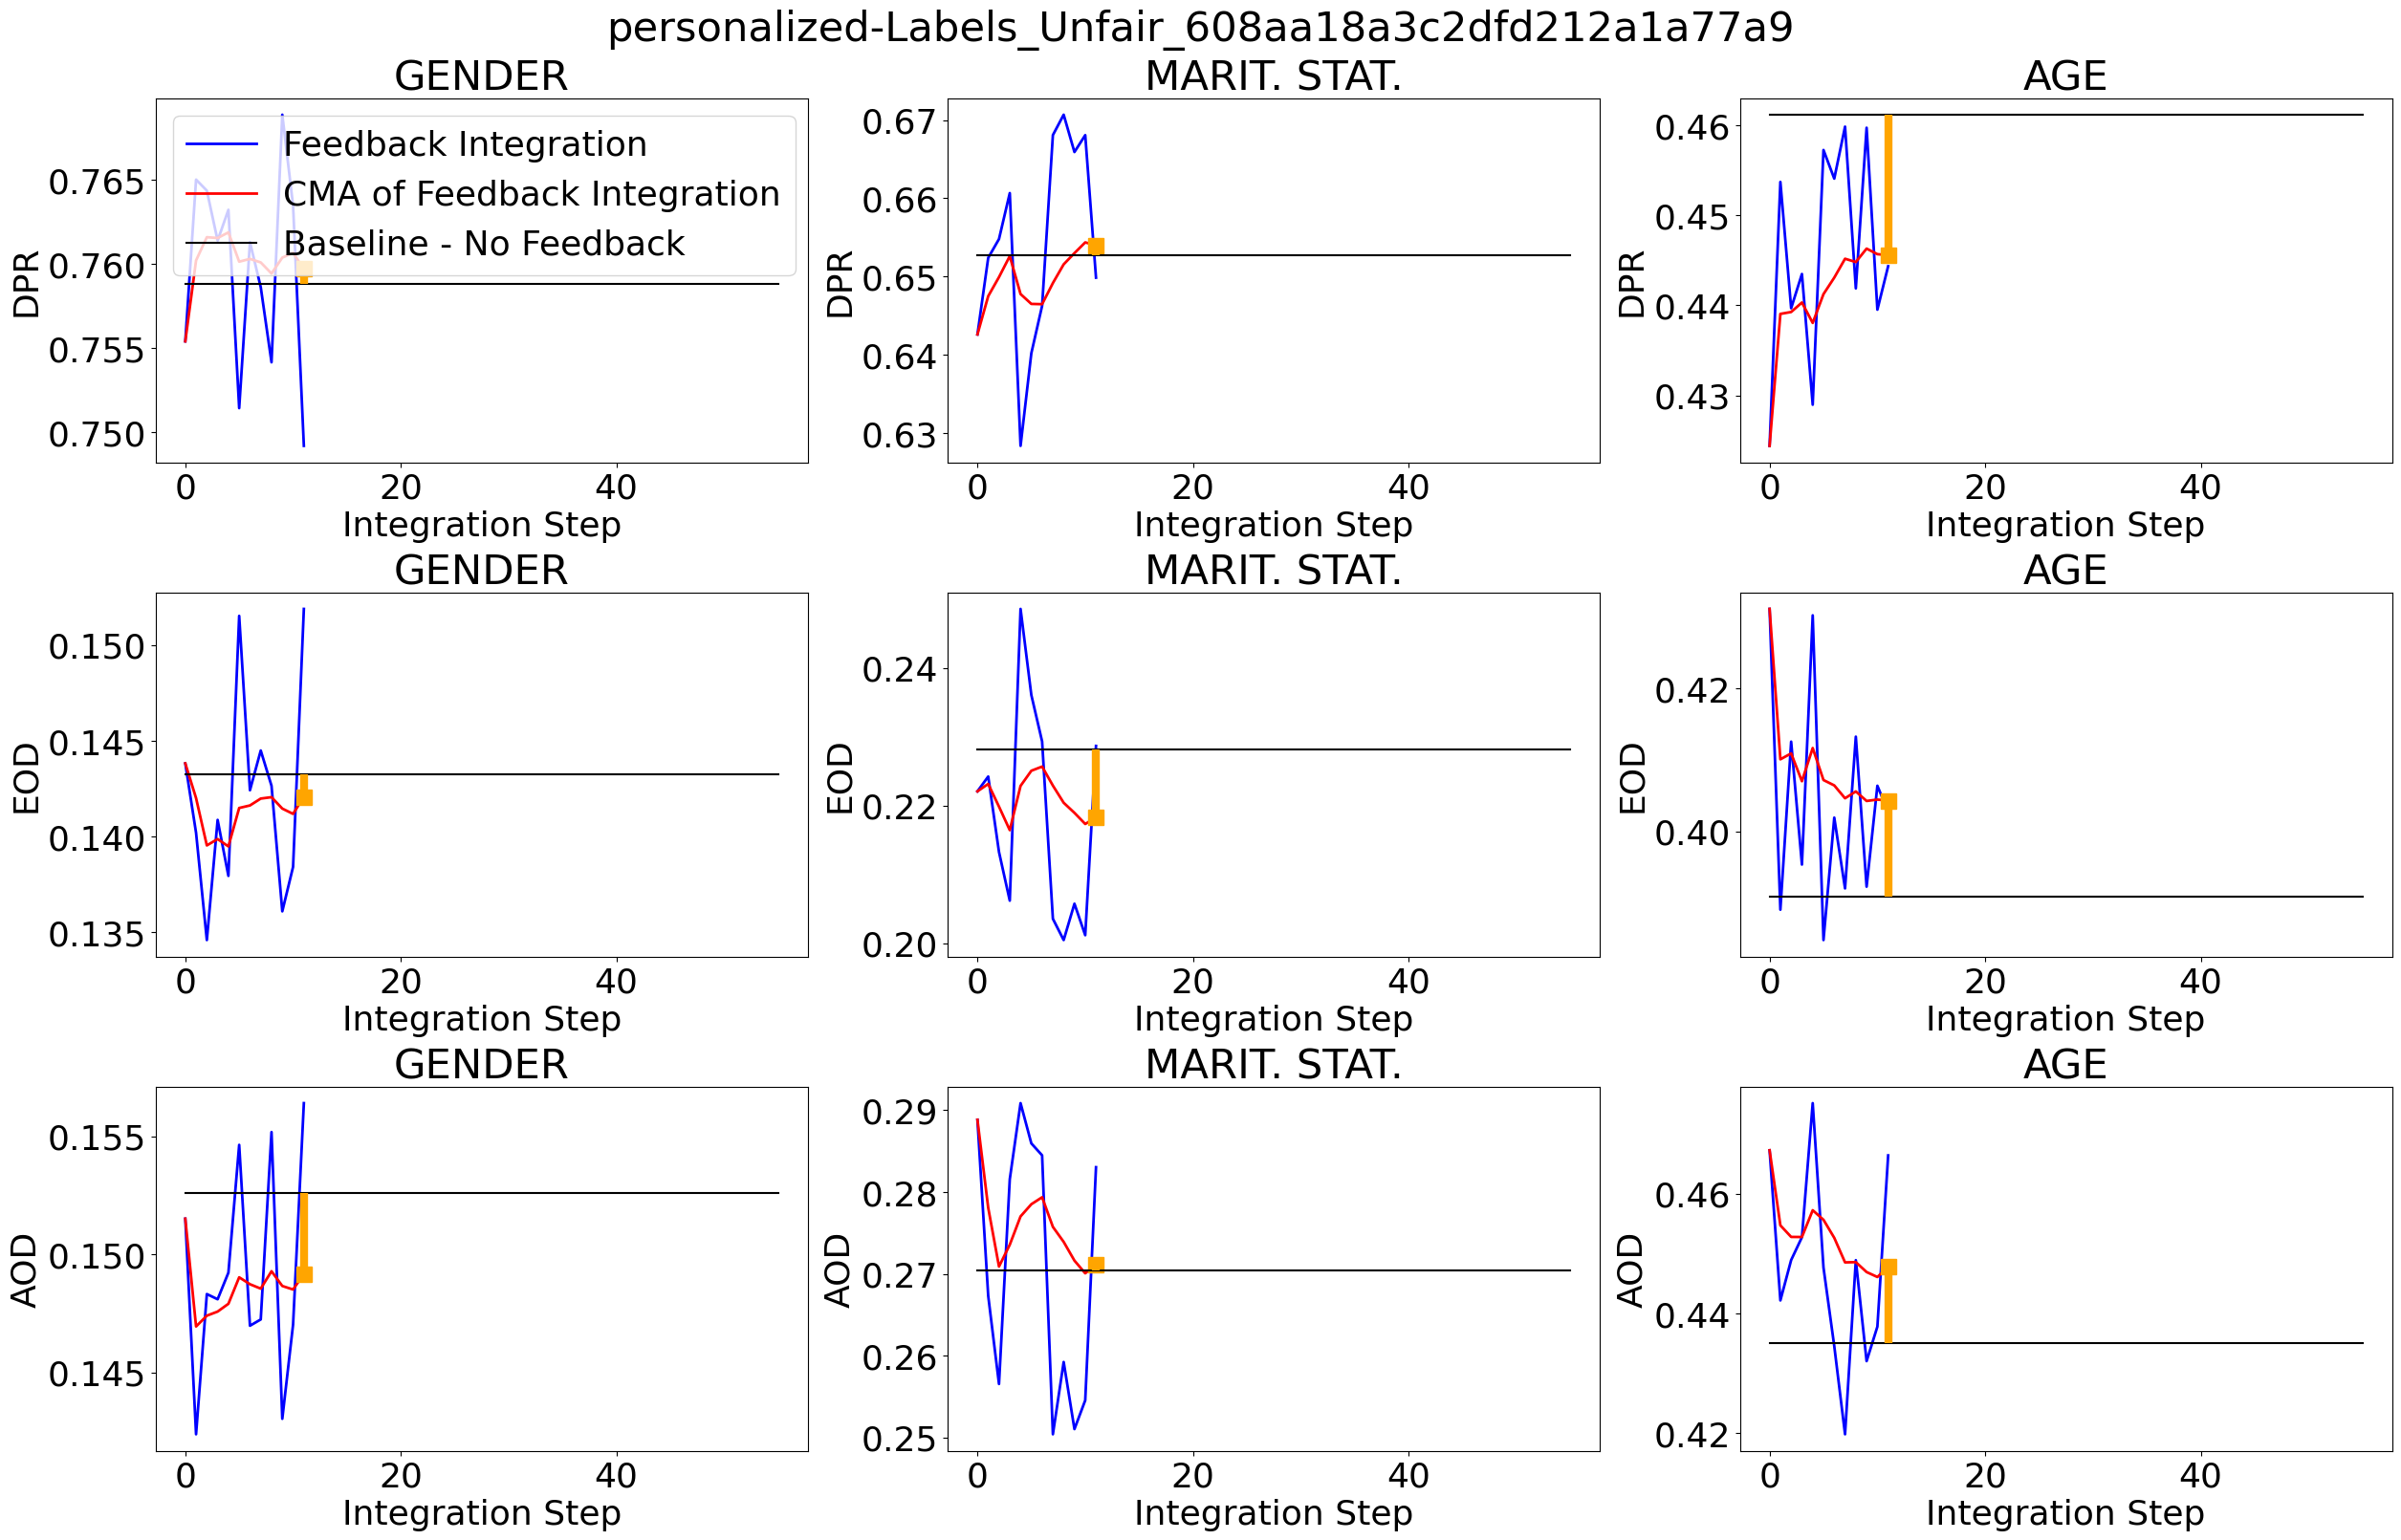

In [12]:
group_f = ['DemographicParityRatio','EqualOpportunityDifference','AverageOddsDifference']
group_fair_cod = ['DPR','EOD','AOD']
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
indiv_f = []
title = 'Personalized-Labels_Unfair_{}'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
image_type = '.pdf'
line_graphs_of_participant(title, fPath, image_type, 
                      sensitive_attrs, 
                      group_f, group_fair_cod, 
                      indiv_f, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True, '608aa18a3c2dfd212a1a77a9')

In [10]:
part_df = df_group[df_group['participant_id']=='608aa18a3c2dfd212a1a77a9']
part_df = part_df[part_df['Feature']=='CODE_GENDER']
len(part_df)

12

## Labels+Weights ('fair'+'unfair')

In [5]:
df_group = pd.read_csv(folder+'data/results/personalized/Labels+Weights/group_fairness_personalized-Labels+Weights_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data/results/personalized/Labels+Weights/individual_fairness_personalized-Labels+Weights_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data/results/personalized/Labels+Weights/accuracy_personalized-Labels+Weights_with_cma.csv', delimiter=',')

perc_change_df = pd.read_csv(folder+"data/results/personalized/Labels+Weights/perc_change_personalized-Labels+Weights_raw.csv", delimiter=',')
cma_perc_change_df = pd.read_csv(folder+"data/results/personalized/Labels+Weights/perc_change_personalized-Labels+Weights_cma.csv", delimiter=',')

p_ids = perc_change_df['participant_id'].tolist()

### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
perc_change_array = []
for i in perc_change_df.index:
    perc_change_array.append(perc_change_df.loc[i].tolist()[:-3])
cma_perc_change_array = []
for i in cma_perc_change_df.index:
    cma_perc_change_array.append(cma_perc_change_df.loc[i].tolist()[:-3])

##
clustered_data = cma_perc_change_array
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
nc = 3
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df.copy(deep=True)
clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
for i,centroid in enumerate(cluster_centroids):
    centroid = centroid.tolist()
    centroid.append('centroid')
    centroid.append(i)
    clustered_data_df.loc[58+i] = centroid
clustered_data_df.to_csv(folder+"data/results/personalized/Labels+Weights/perc_change_personalized-Labels+Weights_clustering_cma_group.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels+Weights_CMA_{}'.format(cl)
    fPath = folder+'data/results/personalized/Labels+Weights/figures/clustering/'
    filename = cl
    image_type = '.jpeg'
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                fPath, filename, image_type, 
                                sensitive_attrs, 
                                group_fair, group_fair_codes, 
                                indiv_fair, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)], 
                                df_indiv.loc[df_indiv['participant_id'].isin(cl_participants)], 
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels+Weights Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels+Weights_Clustering_CMA_Group_cl{}.pdf'
fPath = folder+'data/results/personalized/Labels+Weights/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','ConditionalDemographicDisparity','EqualOpportunityDifference',
                    'AverageOddsDifference','PredictiveParity']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Perc. change plot of all participants

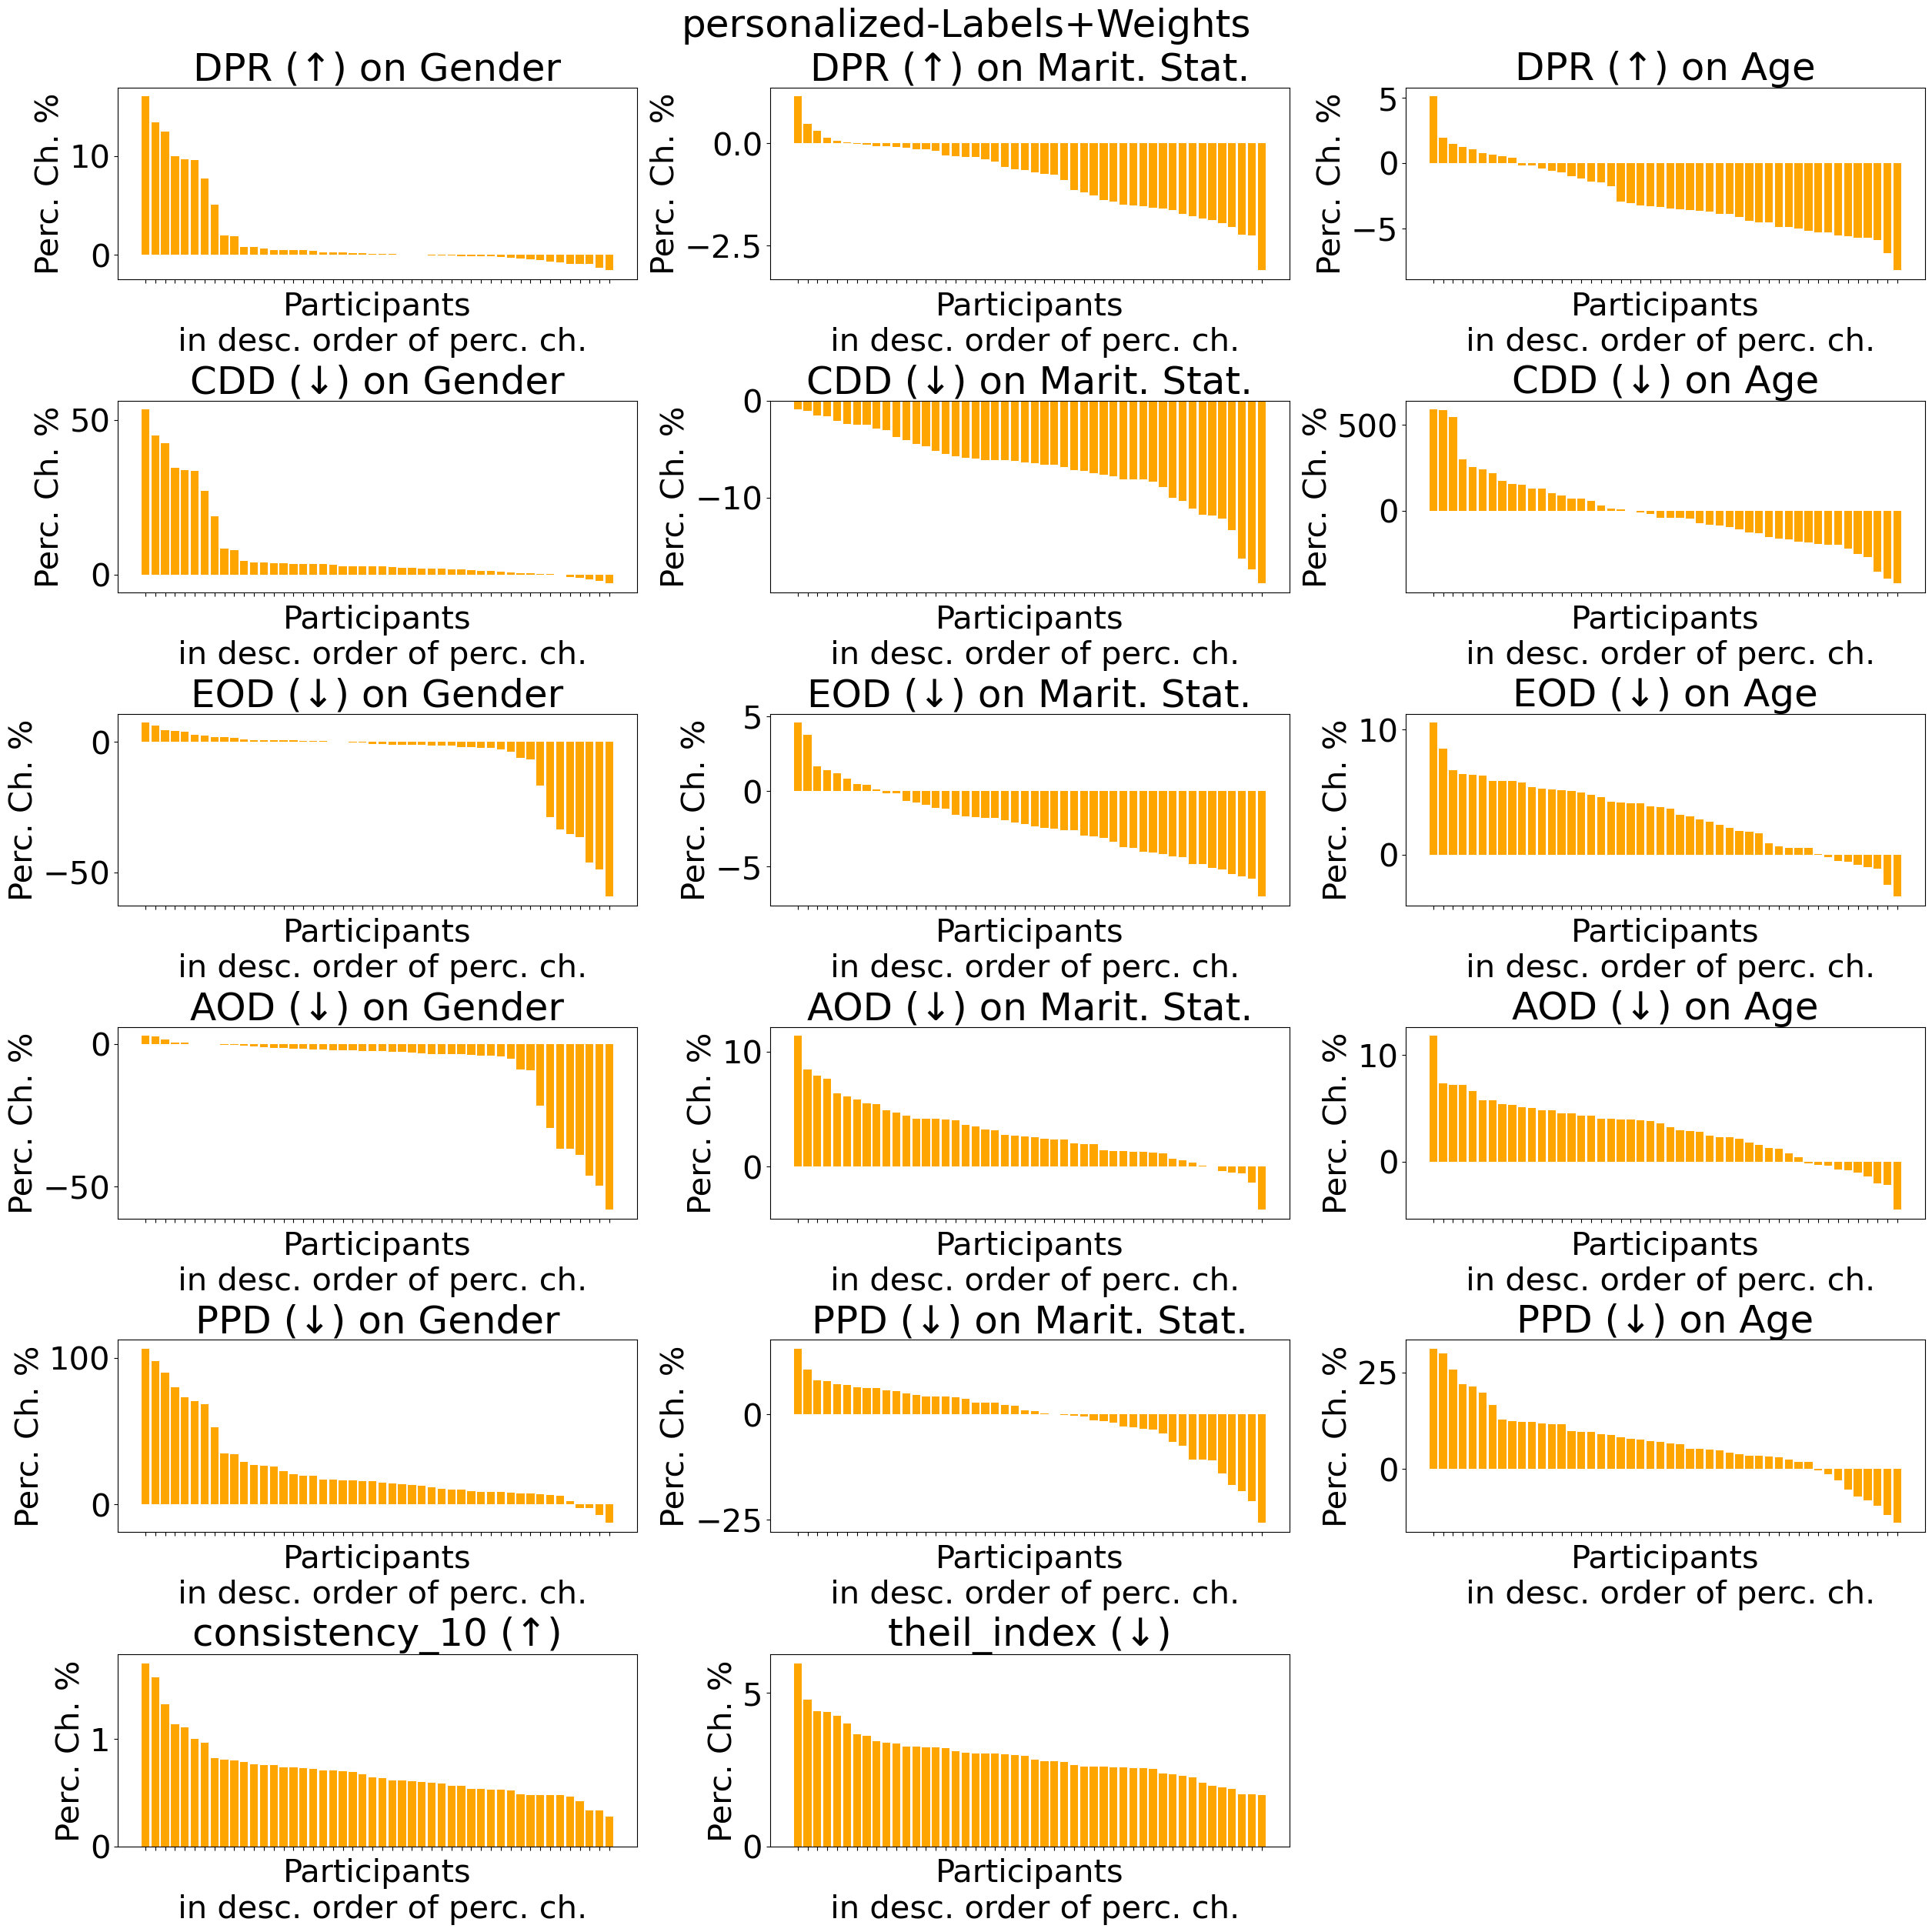

In [15]:
## plot perc. change plot for all fairness metrics
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels+Weights'
file_name = 'percChange_Graphs_personalized-Labels+Weights.pdf'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','ConditionalDemographicDisparity','EqualOpportunityDifference',
                    'AverageOddsDifference','PredictiveParity','indiv.']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

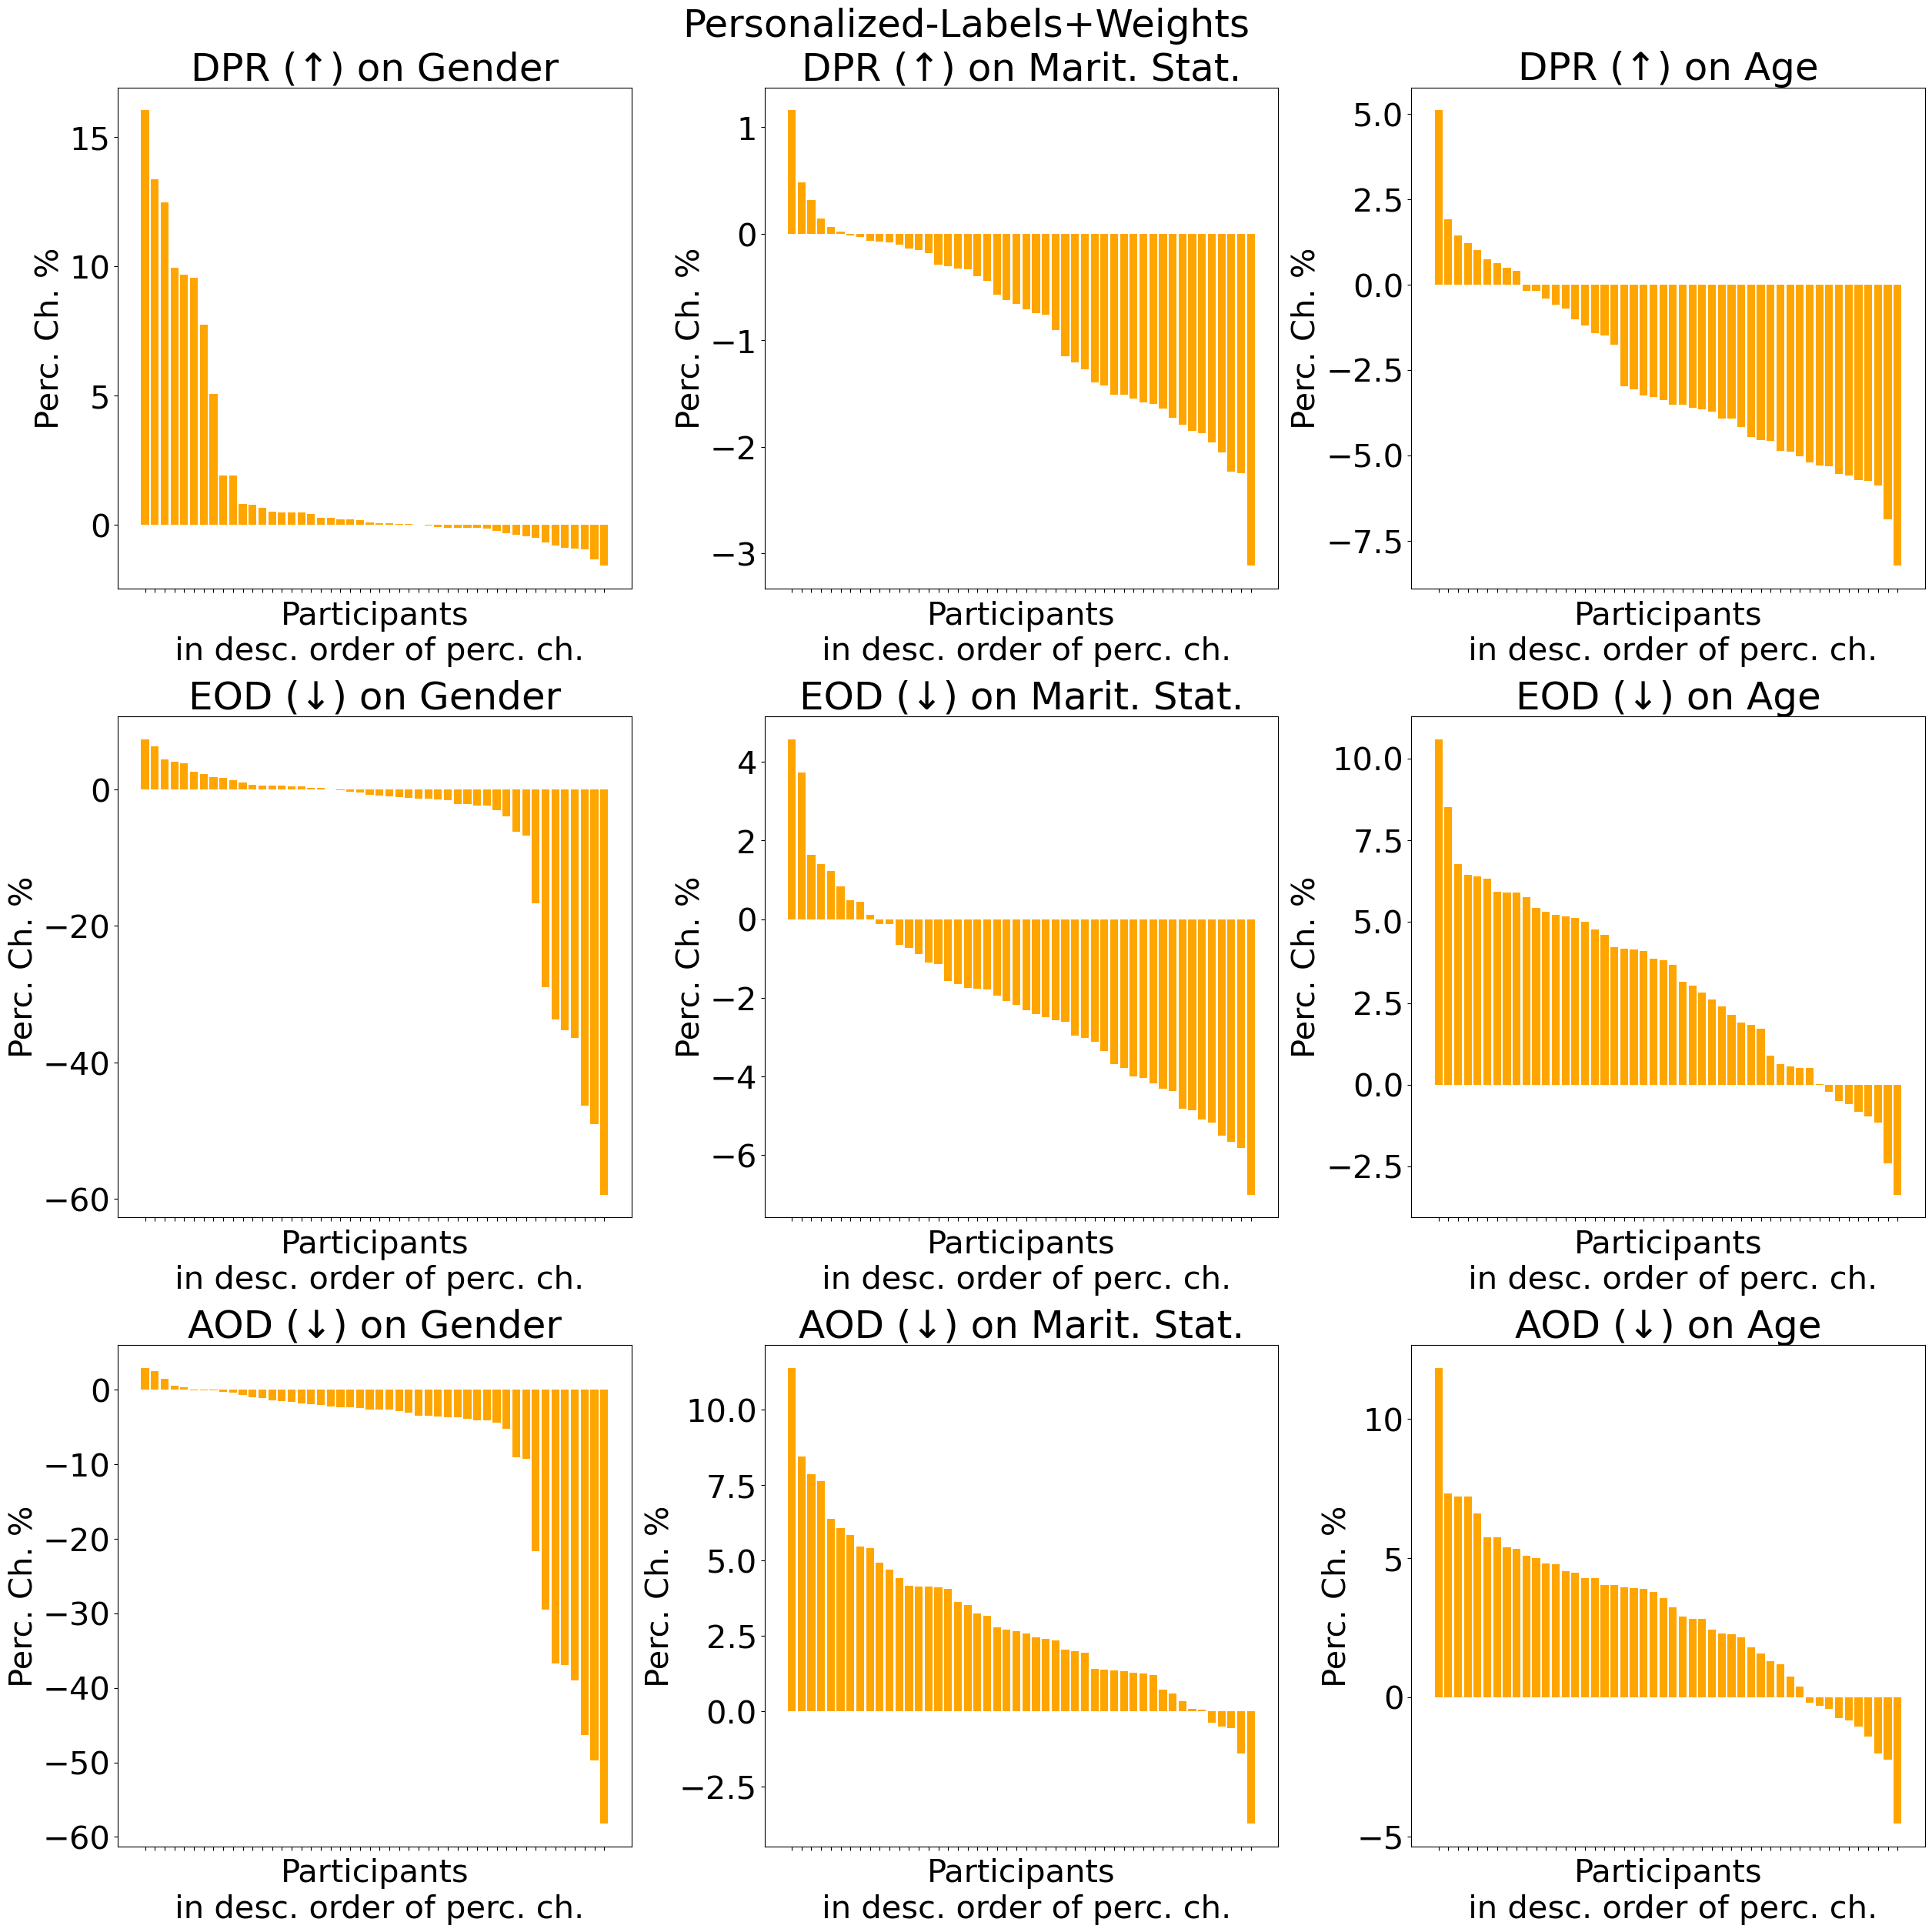

In [12]:
## plot perc. change plot for DPR and AOD
perc_ch_df = cma_perc_change_df
title = 'Personalized-Labels+Weights'
file_name = 'percChange_Graphs_personalized-Labels+Weights_short.pdf'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','EqualOpportunityDifference','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','EOD (↓)','AOD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

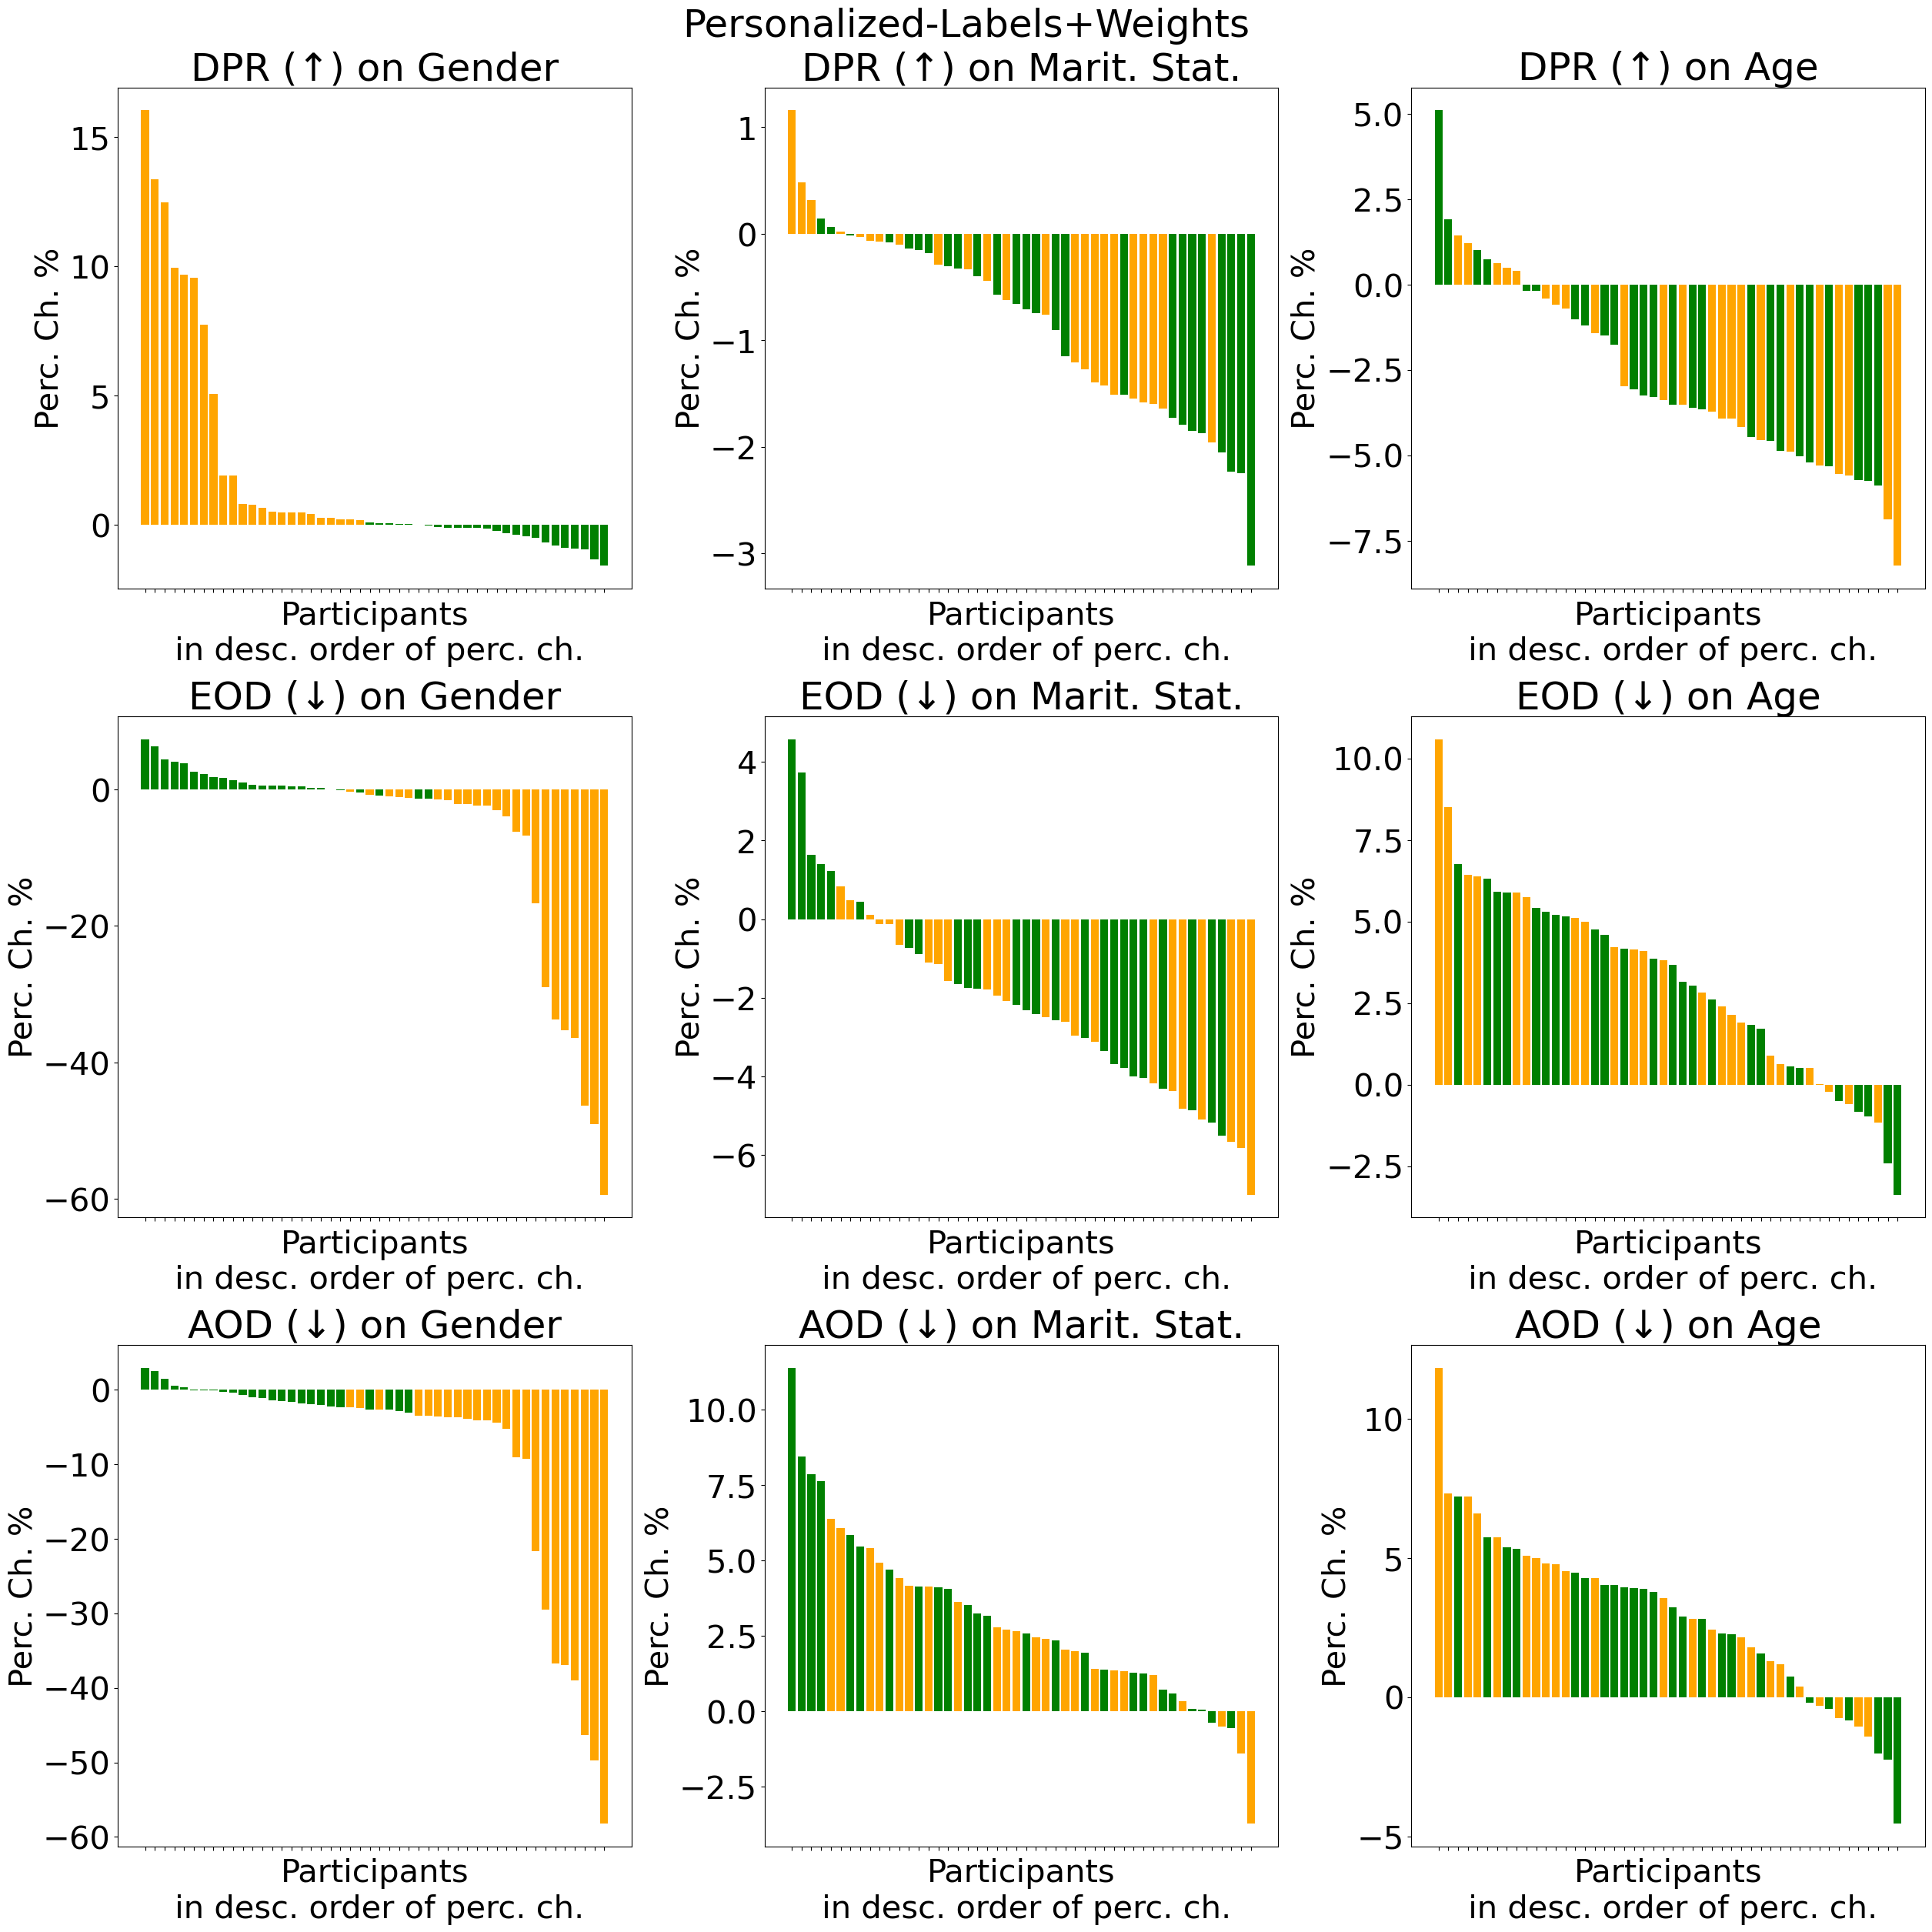

In [9]:
## plot perc. change plot for DPR and AOD
parts = cma_perc_change_df[cma_perc_change_df['CODE_GENDER_DemographicParityRatio']>0.1]['participant_id'].tolist()
colors = ['orange' if cma_perc_change_df.loc[idx]['participant_id'] in parts else 'green' for idx in cma_perc_change_df.index]
perc_ch_df = cma_perc_change_df.copy()
perc_ch_df['color'] = colors
title = 'Personalized-Labels+Weights'
file_name = 'percChange_Graphs_personalized-Labels+Weights_short_DPRGENDERGReater0.pdf'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','EqualOpportunityDifference','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','EOD (↓)','AOD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

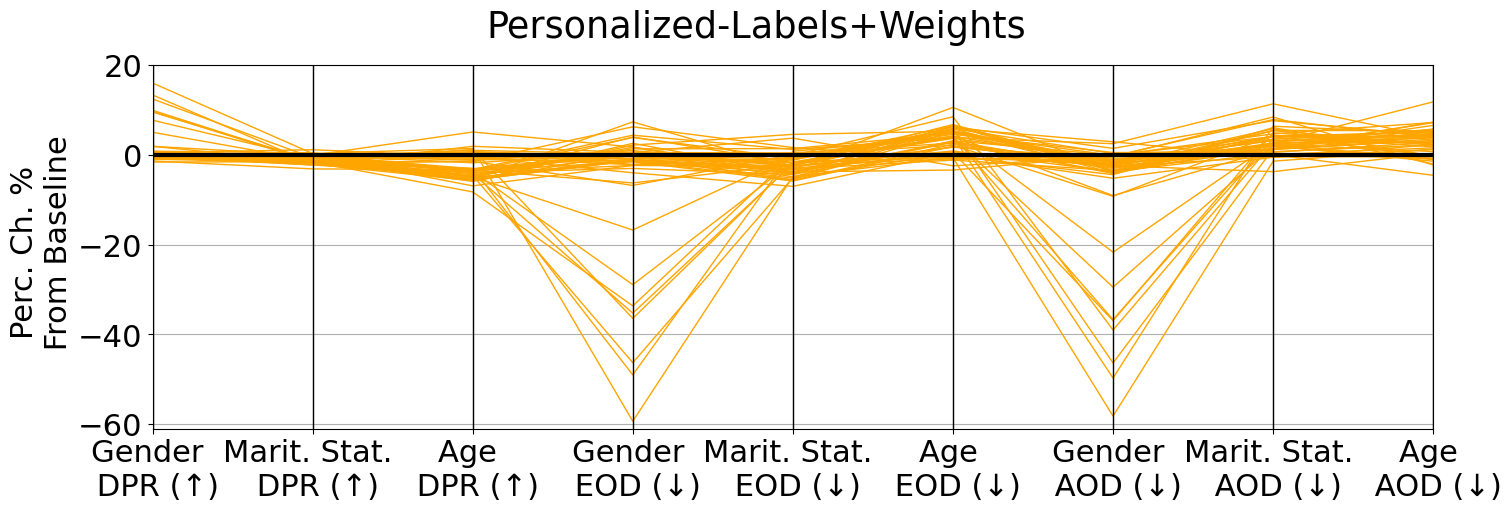

In [13]:
cma_subset = cma_perc_change_df[['CODE_GENDER_DemographicParityRatio','NAME_FAMILY_STATUS_DemographicParityRatio','AGE_DemographicParityRatio',
                                 'CODE_GENDER_EqualOpportunityDifference','NAME_FAMILY_STATUS_EqualOpportunityDifference','AGE_EqualOpportunityDifference',
                                 'CODE_GENDER_AverageOddsDifference','NAME_FAMILY_STATUS_AverageOddsDifference','AGE_AverageOddsDifference']]
cma_subset['class'] = [0]*len(cma_perc_change_df)

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(15, 5), layout="constrained")
fig.suptitle('Personalized-Labels+Weights')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5,6,7,8],[0,0,0,0,0,0,0,0,0], color='black',lw=3)
axes.set_ylim(-61,20)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 'Marit. Stat. \n DPR (↑)','Age \n DPR (↑)',
                           'Gender \n EOD (↓)', 'Marit. Stat. \n EOD (↓)','Age \n EOD (↓)',
                           'Gender \n AOD (↓)', 'Marit. Stat. \n AOD (↓)','Age \n AOD (↓)'])
axes.get_legend().remove()
##
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
file_name = 'parallelCoordGraph_personalized-Labels+Weights_CMA.jpg'
fig.savefig(fPath+file_name, dpi=300)
plt.show()

#### Line graphs for DPR and AOD and 3 protected attributes for a participant 

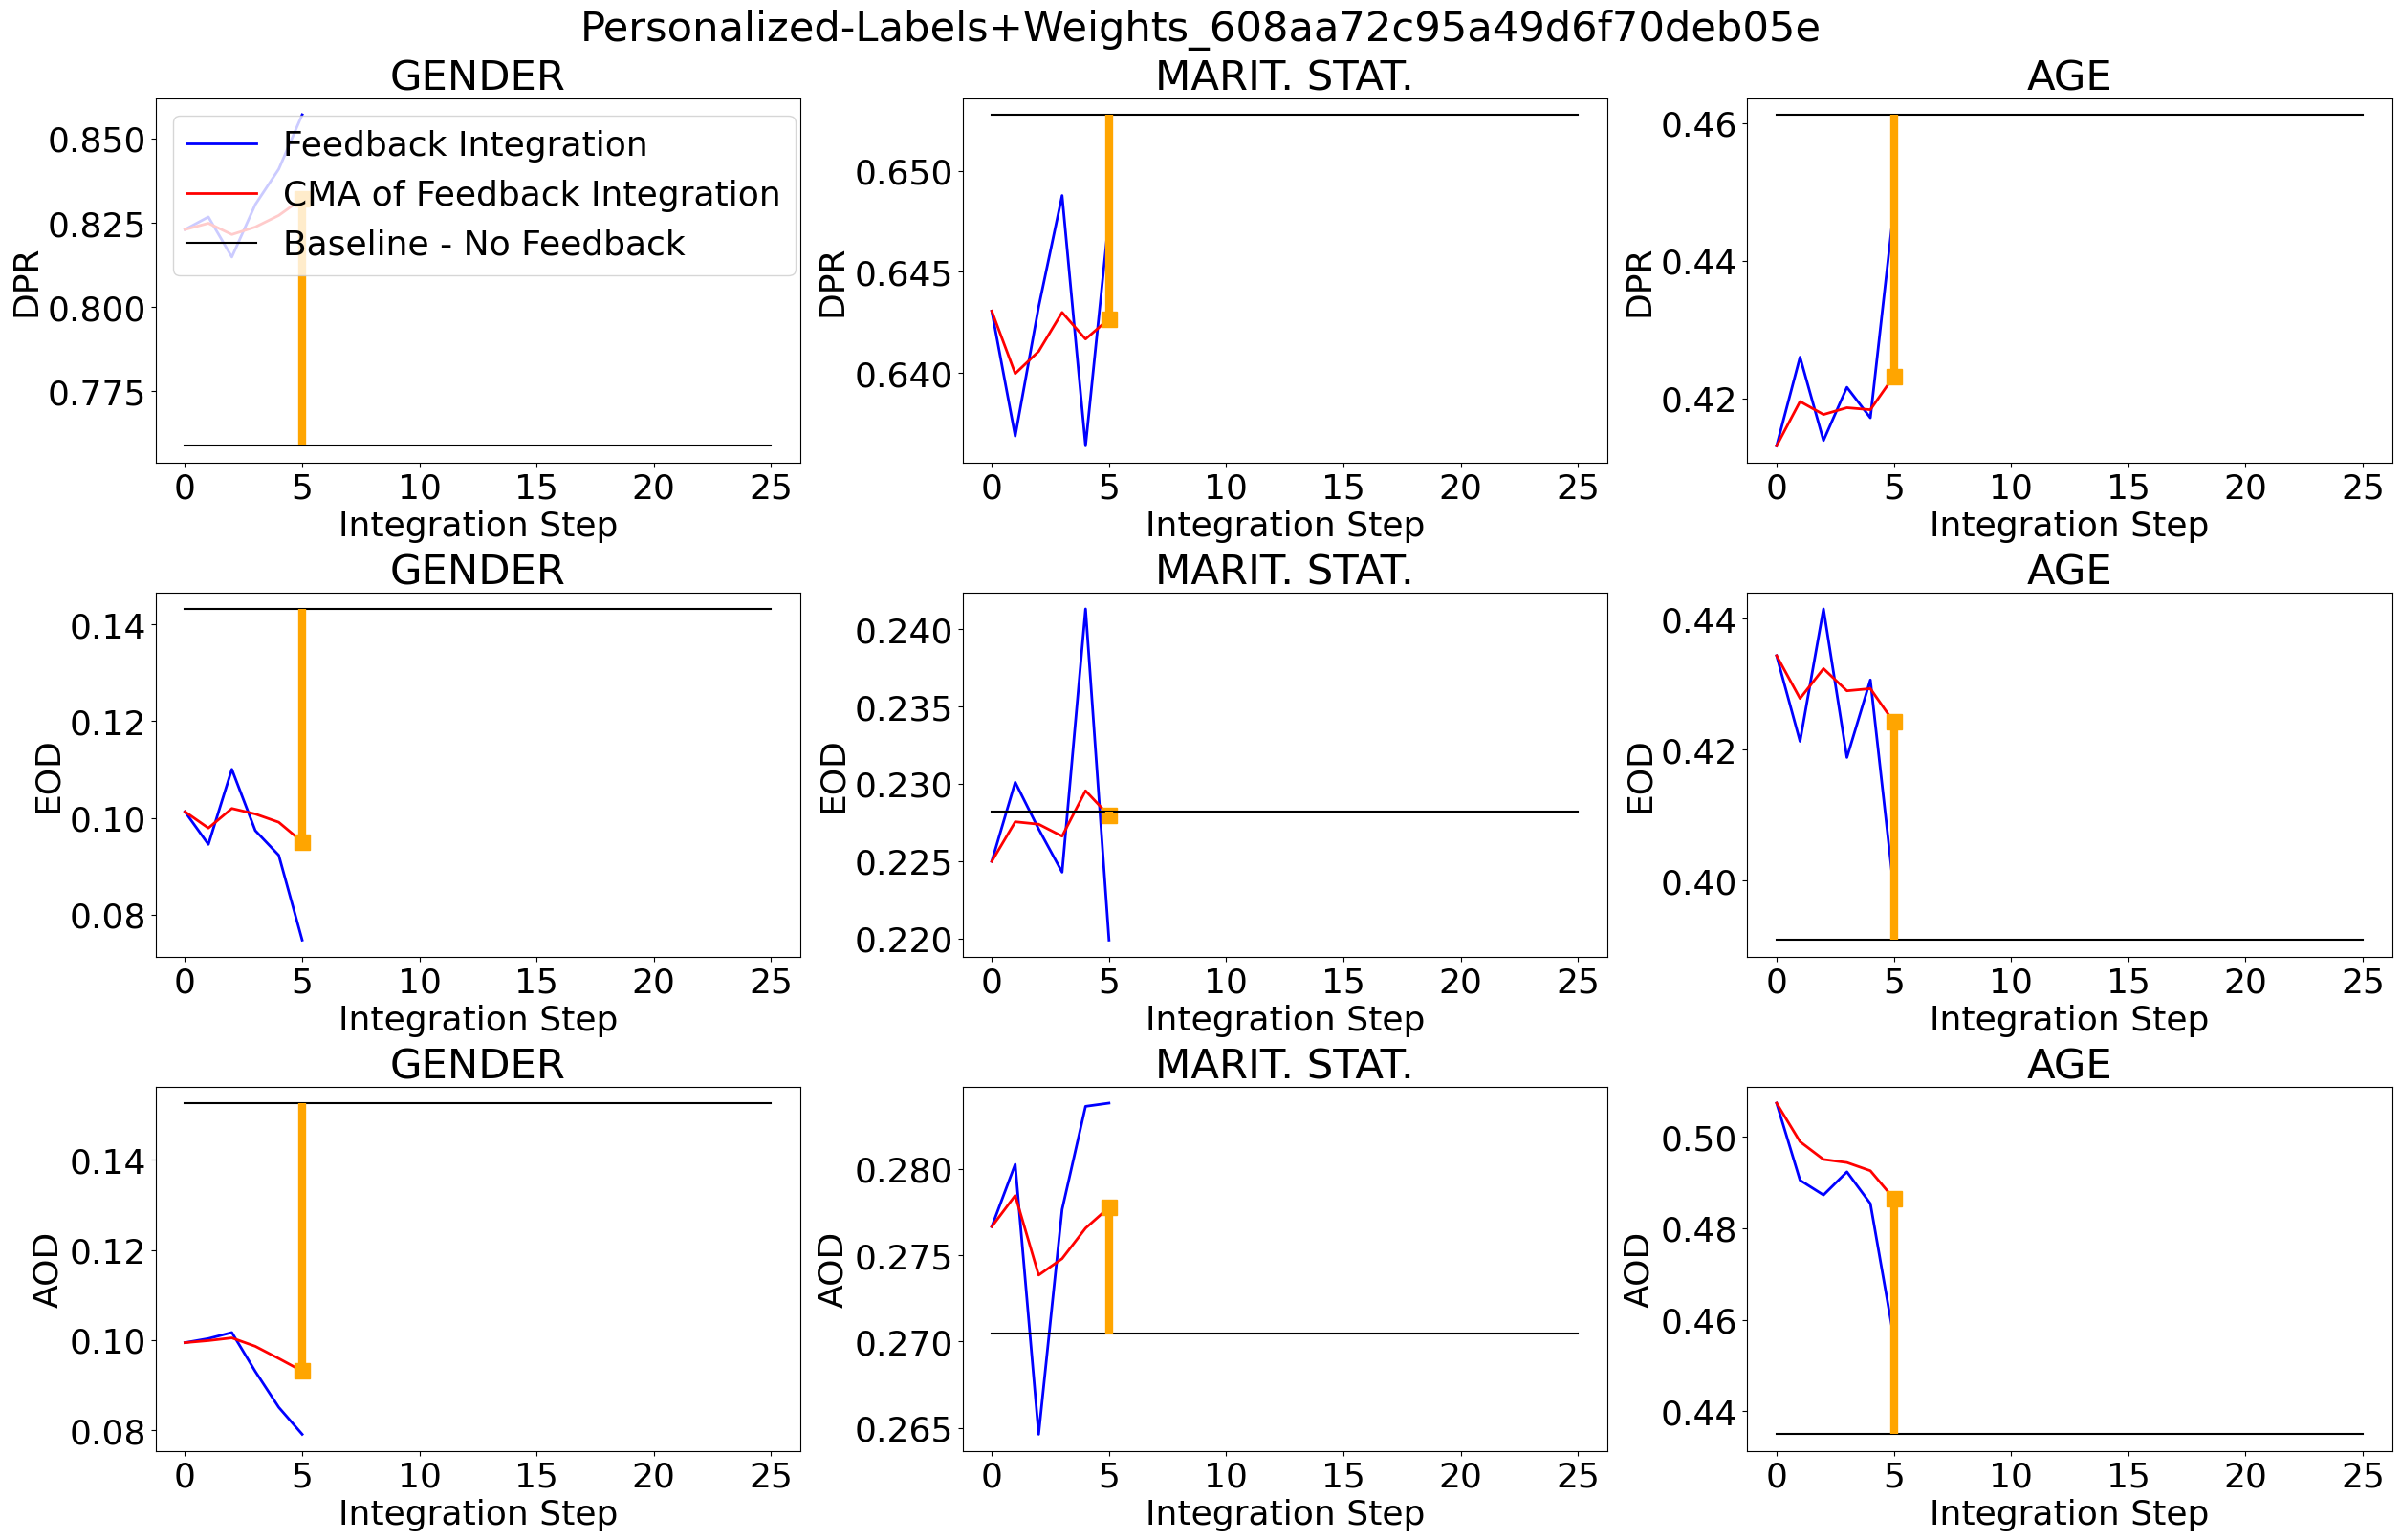

In [14]:
group_f = ['DemographicParityRatio','EqualOpportunityDifference','AverageOddsDifference']
group_fair_cod = ['DPR','EOD','AOD']
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
indiv_f = []
title = 'Personalized-Labels+Weights_{}'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
image_type = '.pdf'
line_graphs_of_participant(title, fPath, image_type, 
                      sensitive_attrs, 
                      group_f, group_fair_cod, 
                      indiv_f, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True, '608aa72c95a49d6f70deb05e')

In [16]:
part_df = df_group[df_group['participant_id']=='608aa72c95a49d6f70deb05e']
part_df = part_df[part_df['Feature']=='CODE_GENDER']
len(part_df)

6

### Line (Raw and CMA) plots

#### Joint plots for all participants

In [ ]:
title = 'personalized-Labels+Weights_all'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, fPath, filename, image_type, 
                            sensitive_attrs, 
                            group_fair, group_fair_codes, 
                            indiv_fair, 
                            fs, 
                            df_group, df_indiv, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'personalized-Labels+Weights_{}'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
image_type = '.jpeg'
plots_per_participant(title, fPath, image_type, 
                      sensitive_attrs, 
                      group_fair, group_fair_codes, 
                      indiv_fair, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True)